### Cargamos las librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact 

## Cargamos los datos

In [2]:
url_nuevos   = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto13/CasosNuevosCumulativo_T.csv"
data_nuevos  = pd.read_csv(url_nuevos)
data_nuevos = data_nuevos.rename(columns = {'Region':'Fecha'})
data_nuevos.tail(5)

,Fecha,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Coquimbo,Valparaíso,Metropolitana,O’Higgins,Maule,Ñuble,Biobío,Araucanía,Los Ríos,Los Lagos,Aysén,Magallanes,Total
89,2020-05-31,31,111,81,3,31,130,4253,29,41,1,91,11,11,3,1,2,4830
90,2020-06-01,17,165,75,14,40,181,4735,28,44,33,91,40,7,0,0,1,5471
91,2020-06-02,18,68,64,4,19,247,2955,30,40,0,12,30,5,31,1,3,3527
92,2020-06-03,47,88,67,6,31,174,3997,88,214,39,133,32,4,19,0,3,4942
93,2020-06-04,35,128,146,16,54,248,3699,36,137,43,86,9,7,13,1,6,4664


In [3]:
url_acumulados  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto3/CasosTotalesCumulativo_T.csv"
data_acumulados = pd.read_csv(url_acumulados)
data_acumulados = data_acumulados.rename(columns = {'Region':'Fecha'})
data_acumulados.tail(5)

,Fecha,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Coquimbo,Valparaíso,Metropolitana,O’Higgins,Maule,Ñuble,Biobío,Araucanía,Los Ríos,Los Lagos,Aysén,Magallanes,Total
89,2020-05-31,619,2361,2510,218,628,3167,80504,785,1297,1257,1979,2071,356,863,17,1056,99688
90,2020-06-01,636,2526,2585,232,668,3348,85239,813,1341,1290,2070,2111,363,863,17,1056,105159
91,2020-06-02,654,2594,2649,236,687,3595,88194,843,1381,1290,2082,2141,368,894,18,1060,108686
92,2020-06-03,701,2682,2716,242,718,3769,92191,931,1595,1329,2215,2173,372,913,18,1063,113628
93,2020-06-04,736,2810,2862,258,772,4017,95890,967,1732,1372,2301,2182,379,926,19,1069,118292


## Nuevos contagios por día vs contagios totales

In [8]:
def graph(region):
    fechas        = data_nuevos["Fecha"].values.tolist()
    casos_nuevos  = data_nuevos[region].values.tolist()
    casos_totales = data_acumulados[region].values.tolist()
    
    plt.figure(figsize=(20,15))
    plt.plot(casos_totales, casos_nuevos, 'bo-')
    plt.title("Region: " + region)
    plt.grid()
    plt.xlabel('Casos totales')
    plt.ylabel('Casos nuevos')
    #plt.xscale('log')
    #plt.yscale('log')
    plt.show()

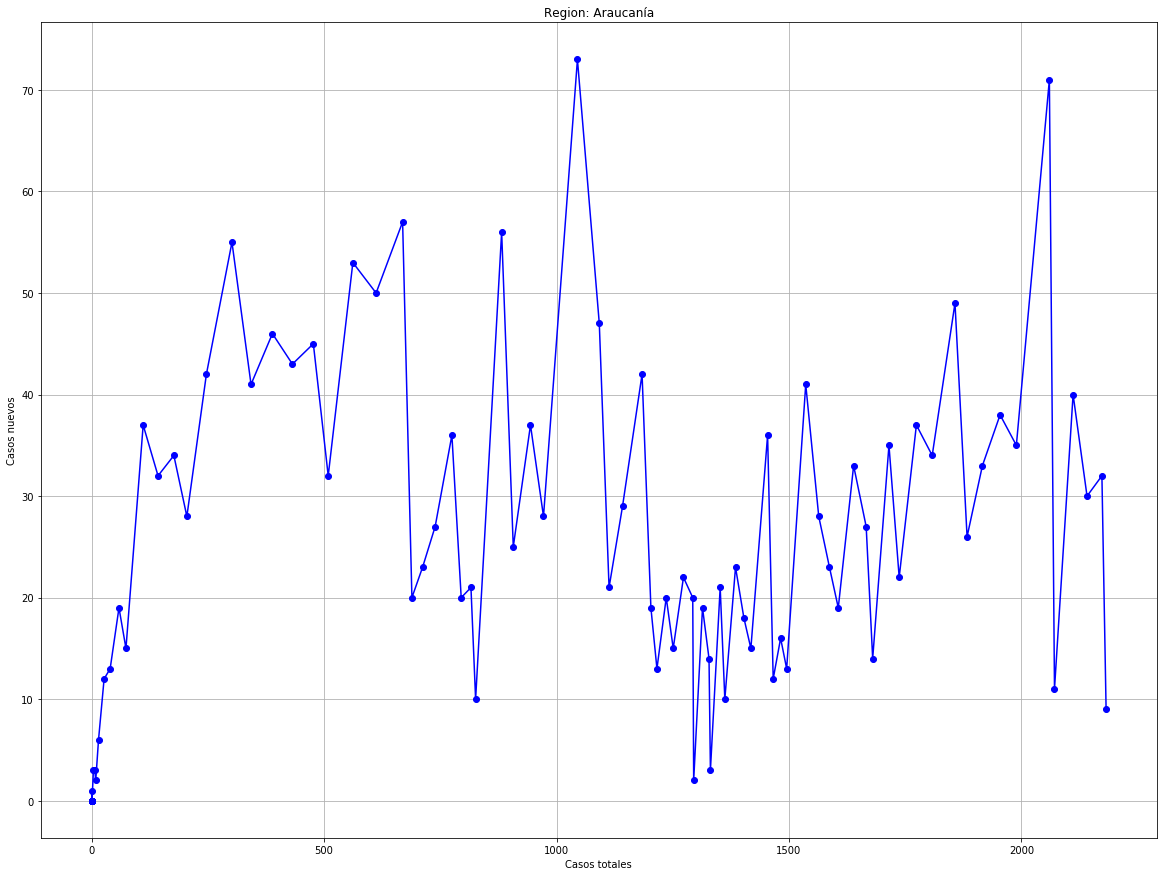

In [9]:
graph("Araucanía")

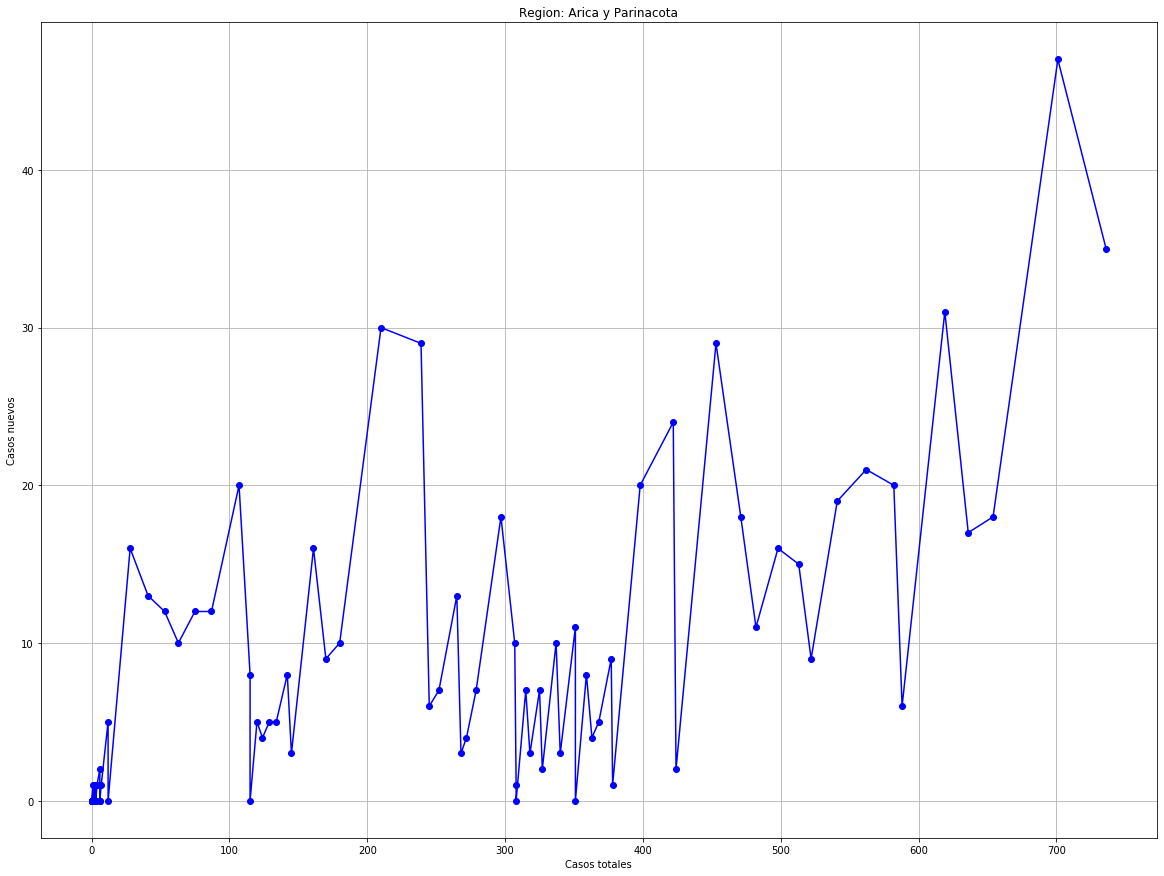

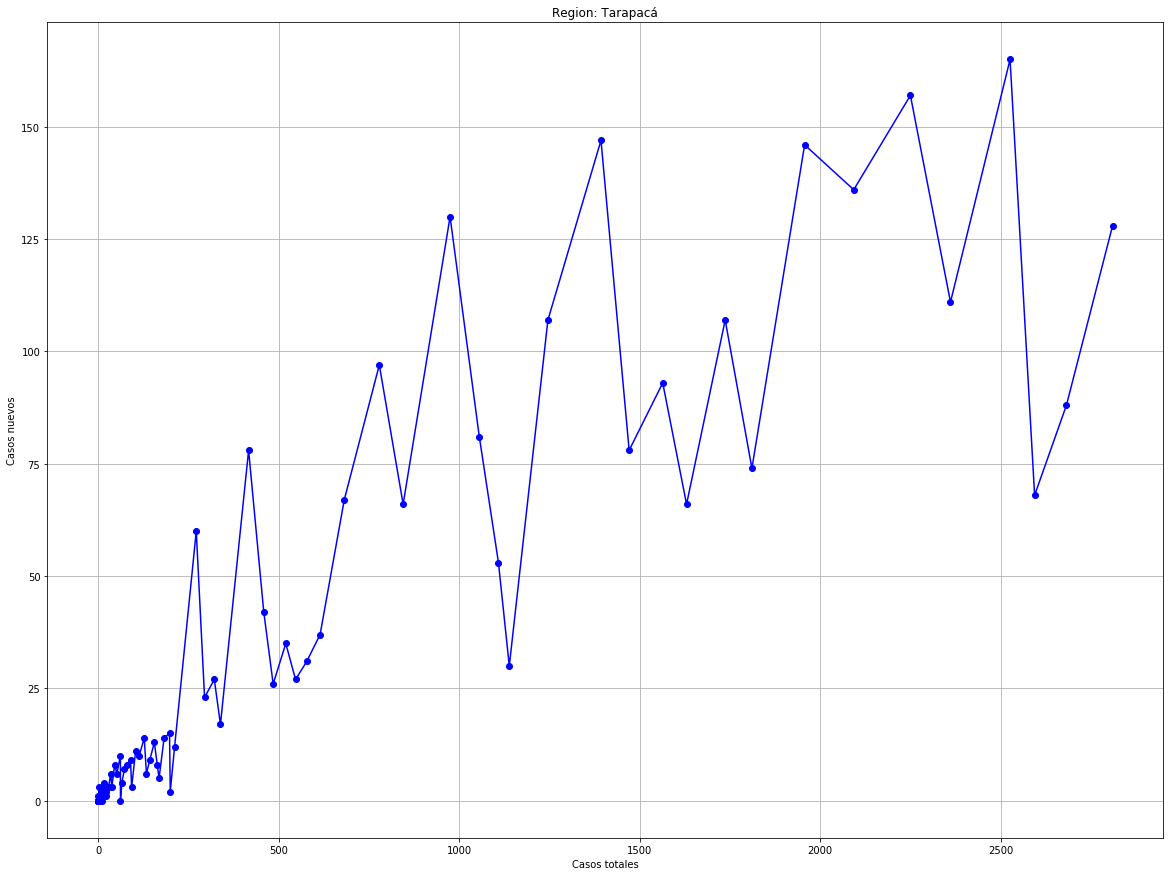

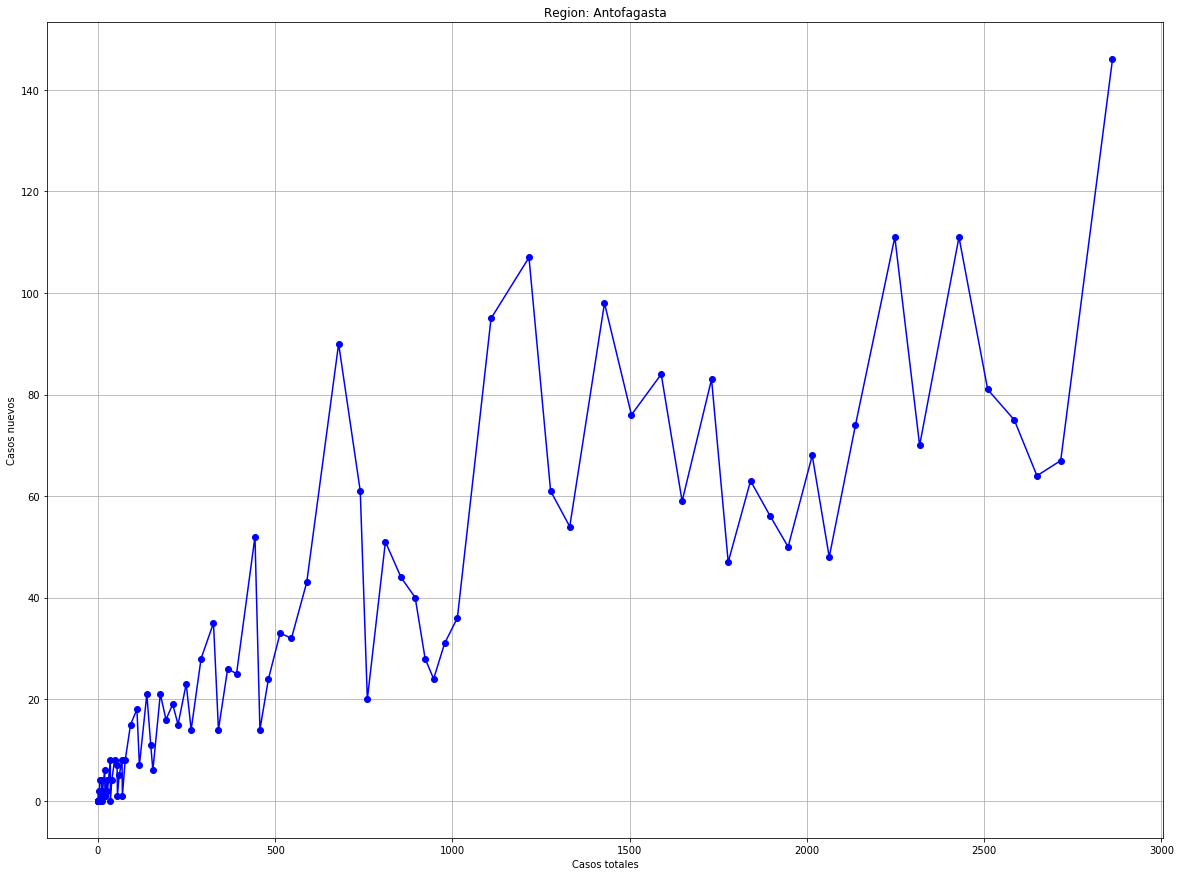

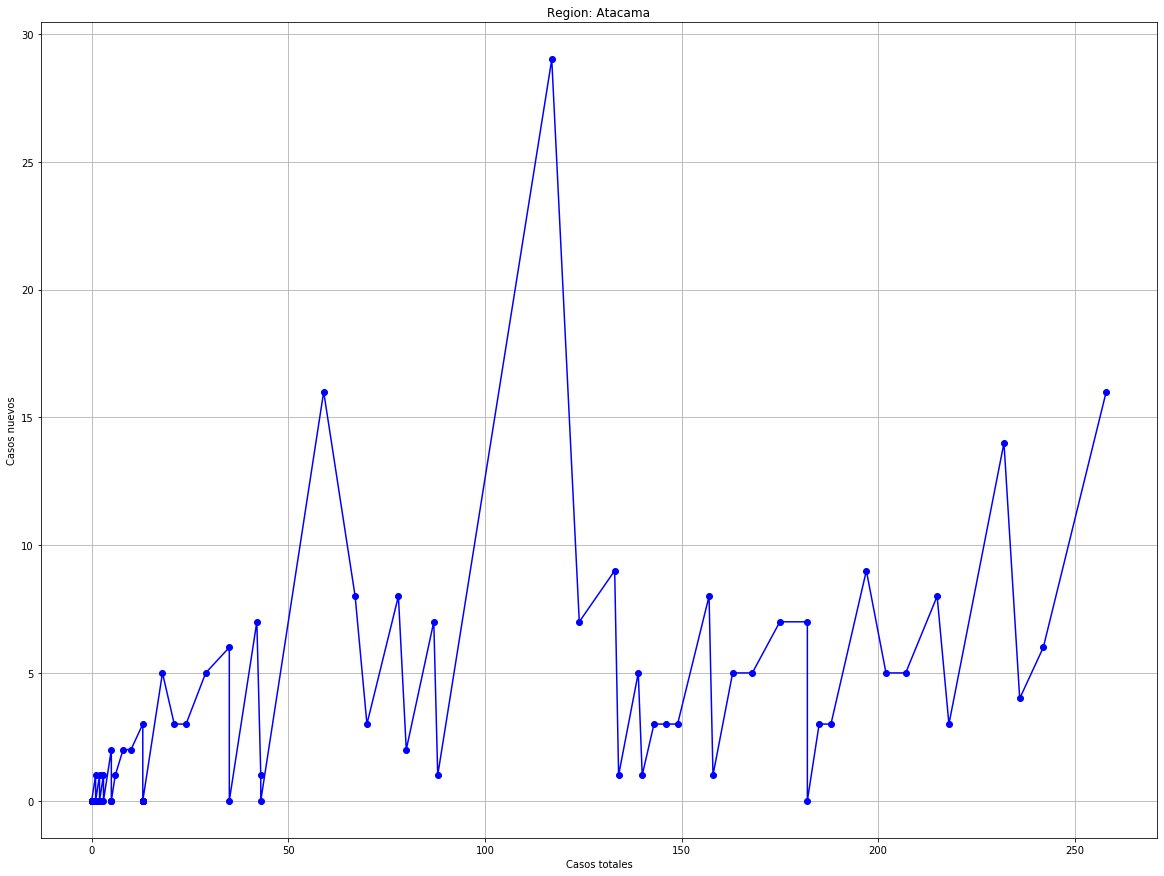

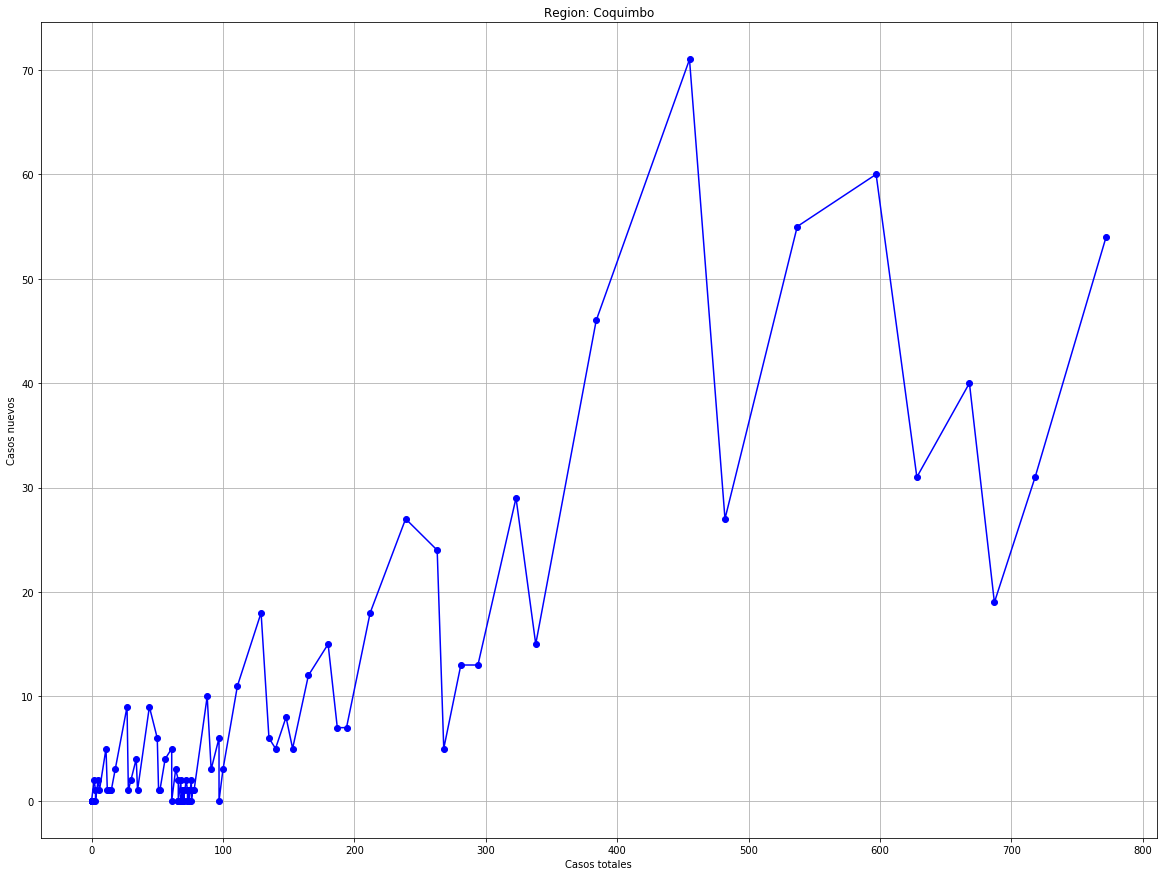

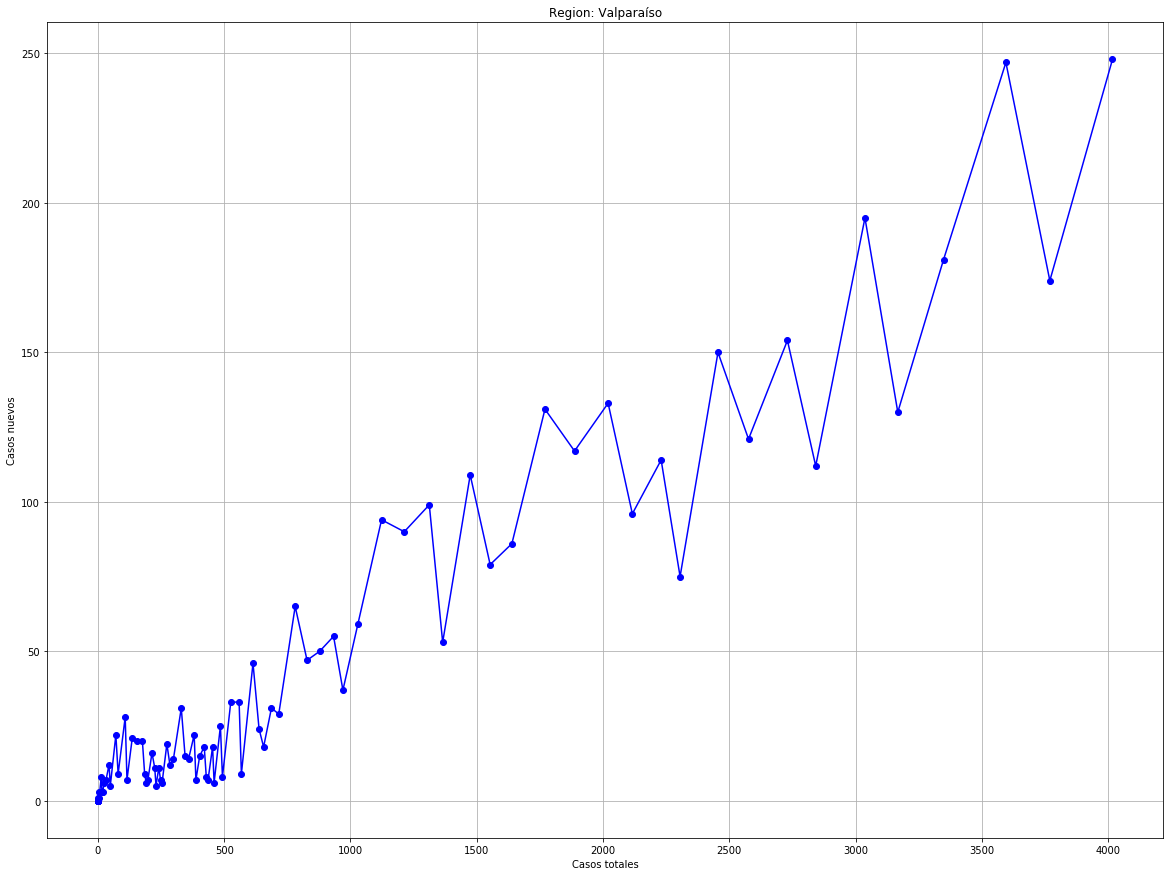

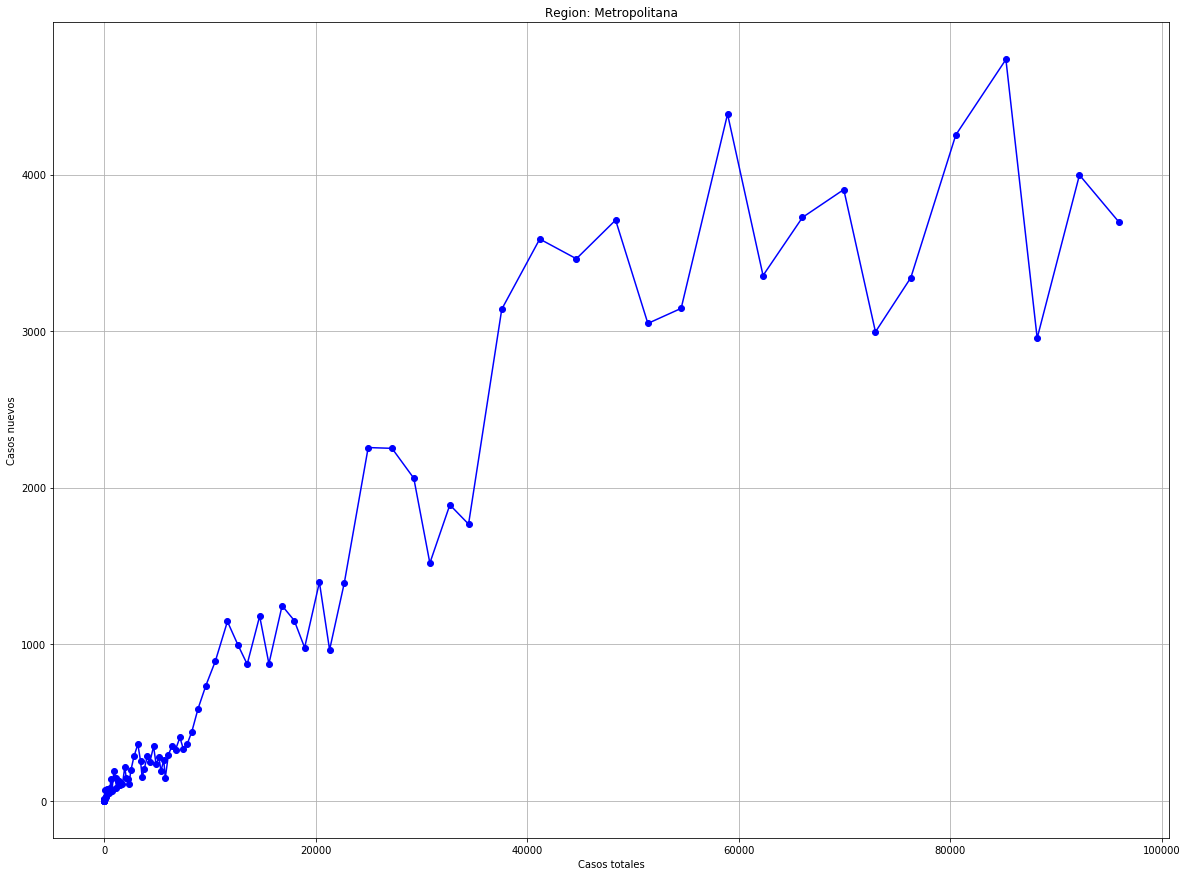

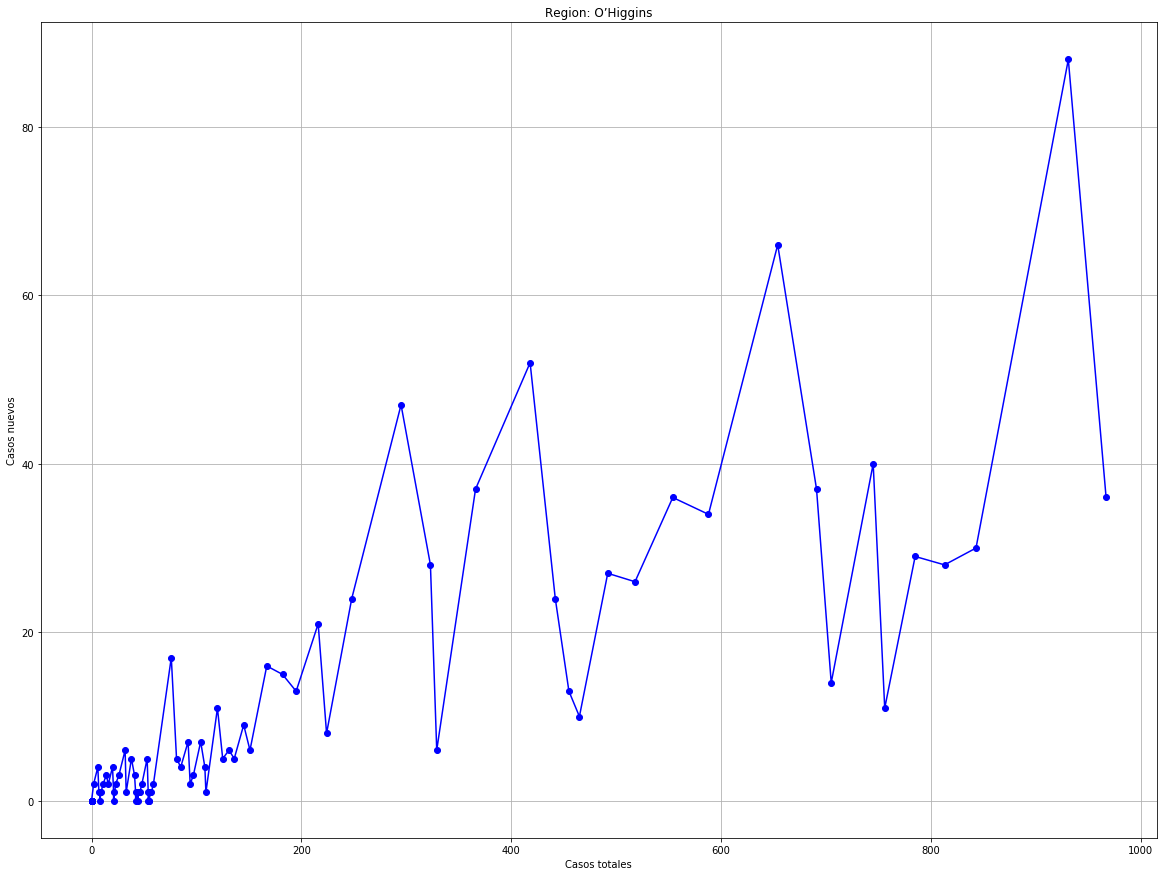

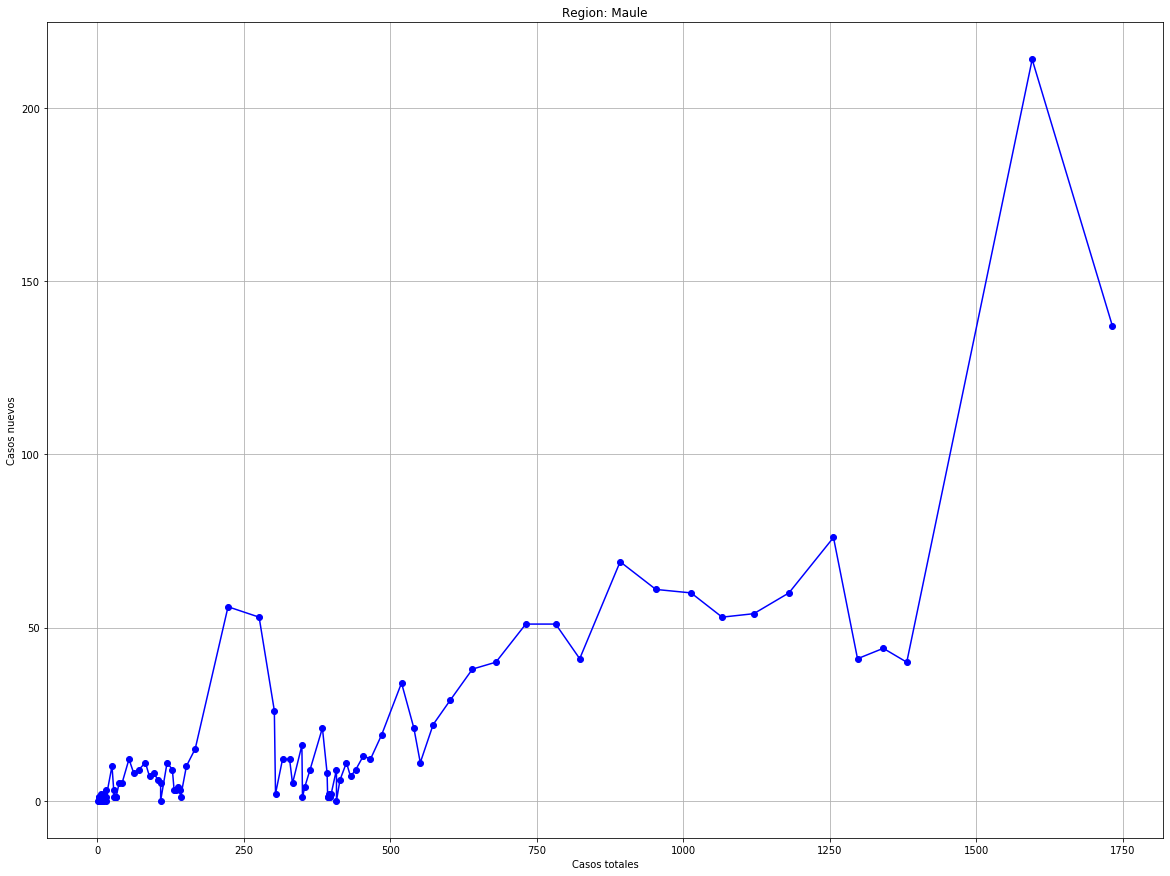

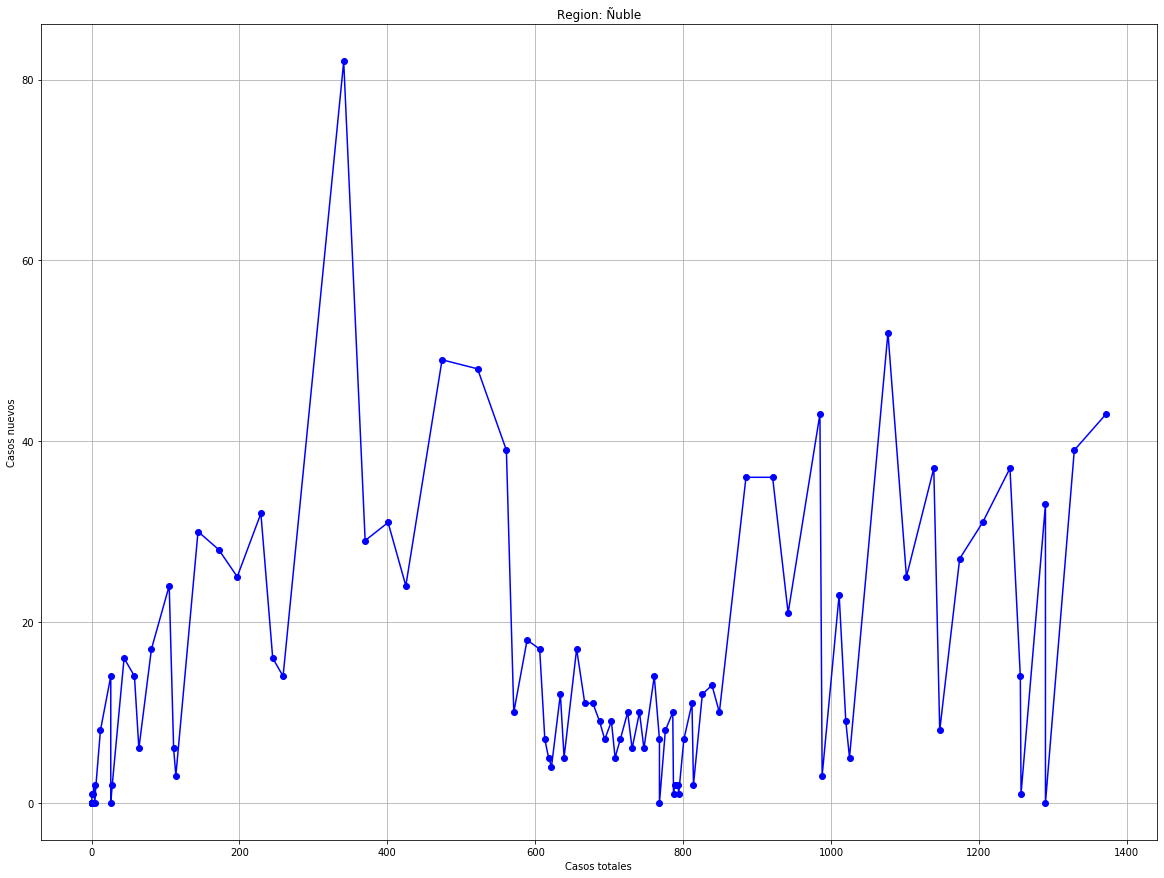

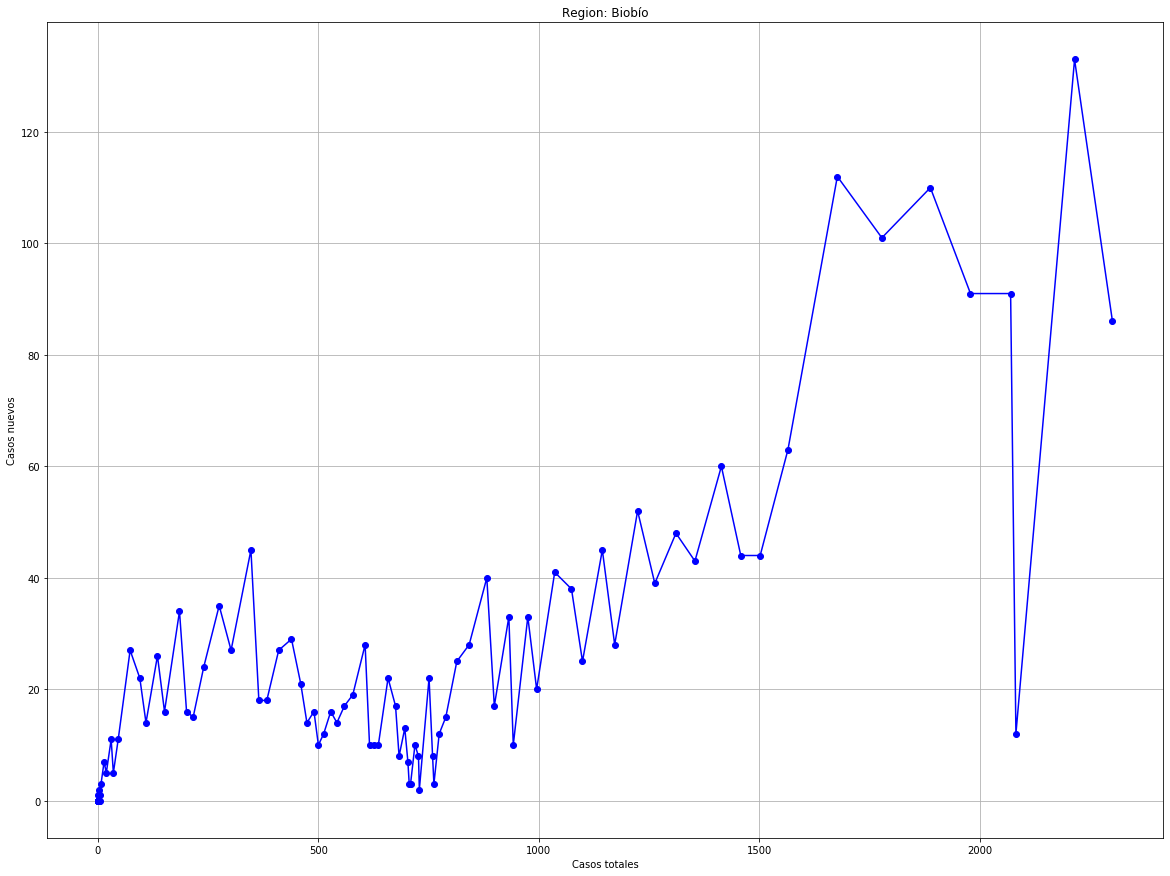

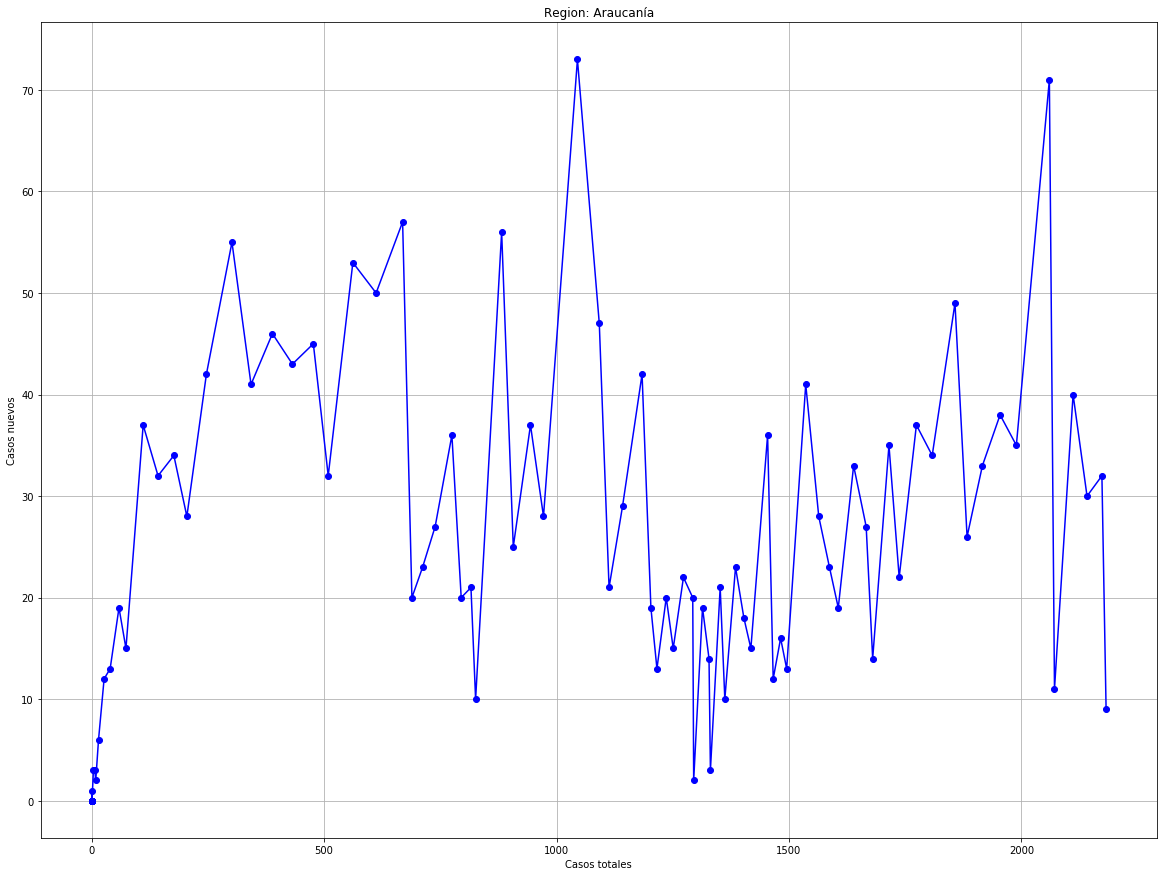

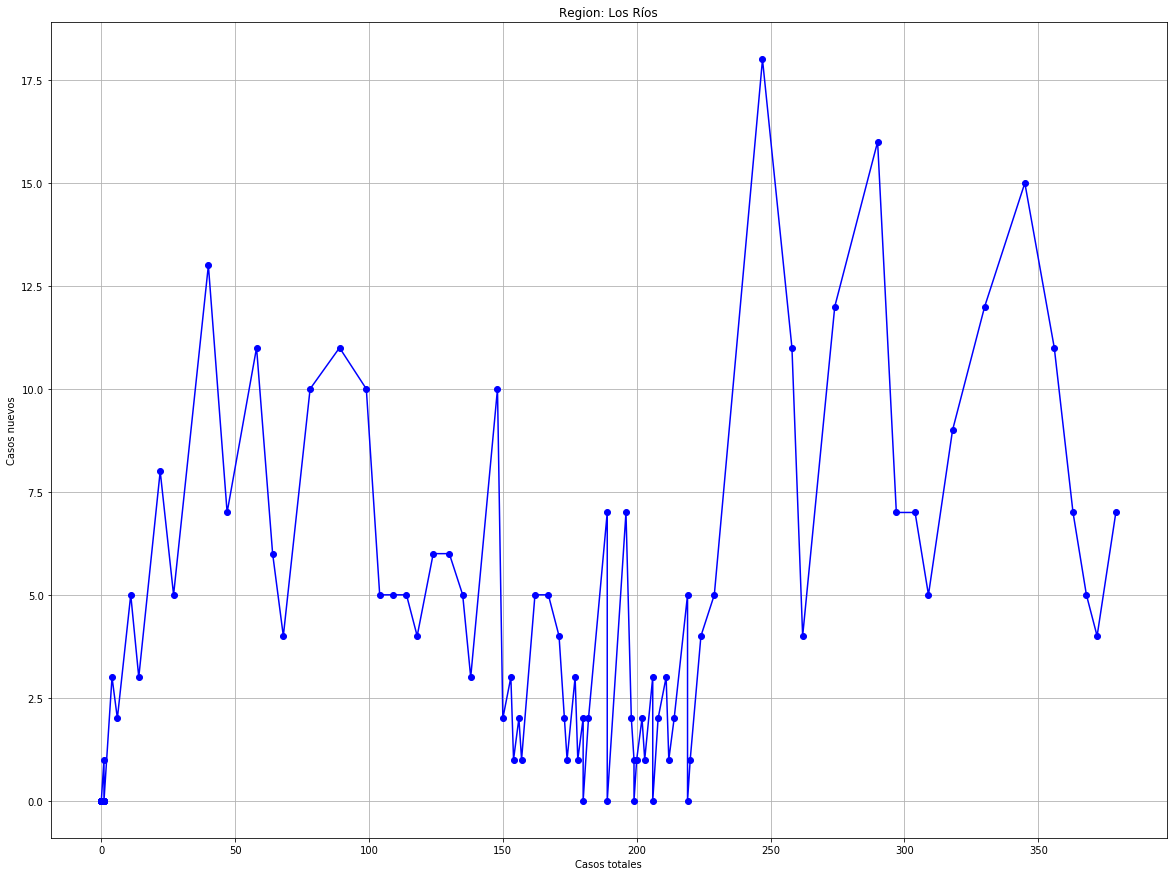

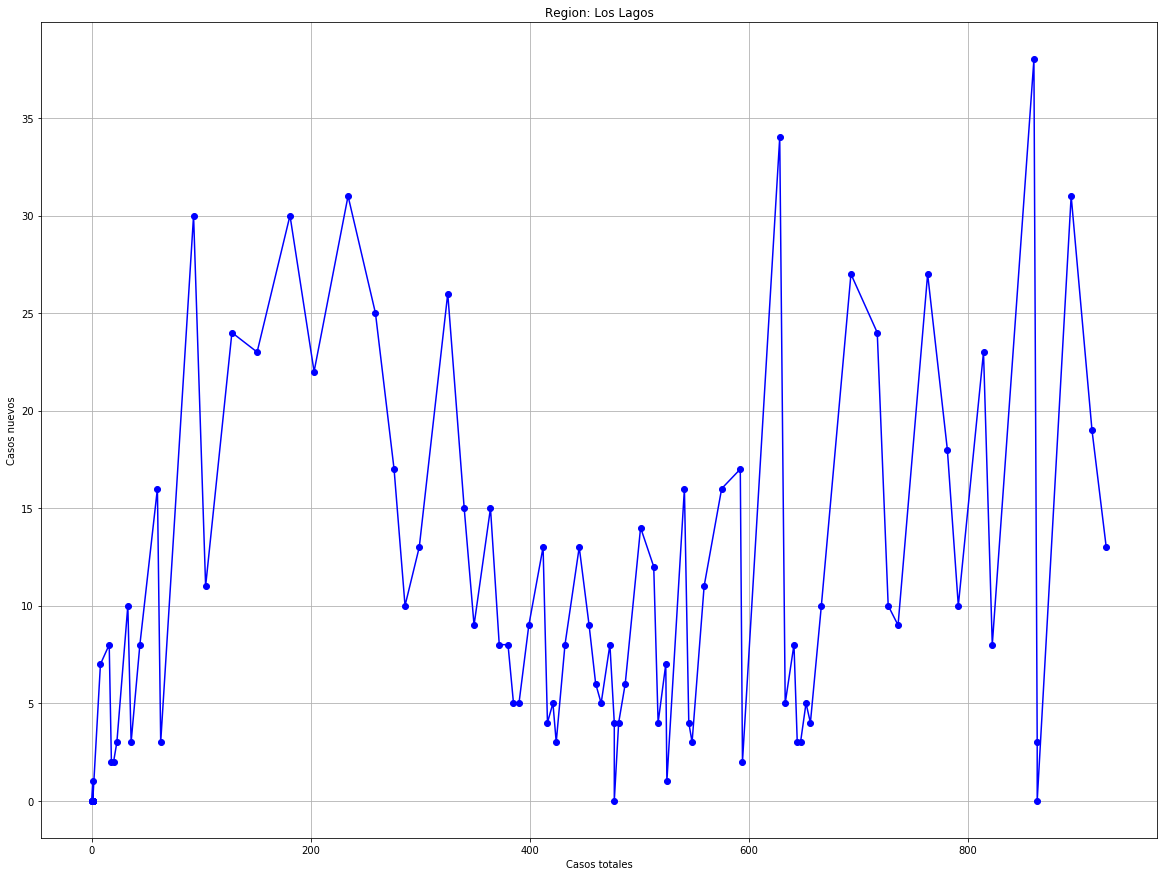

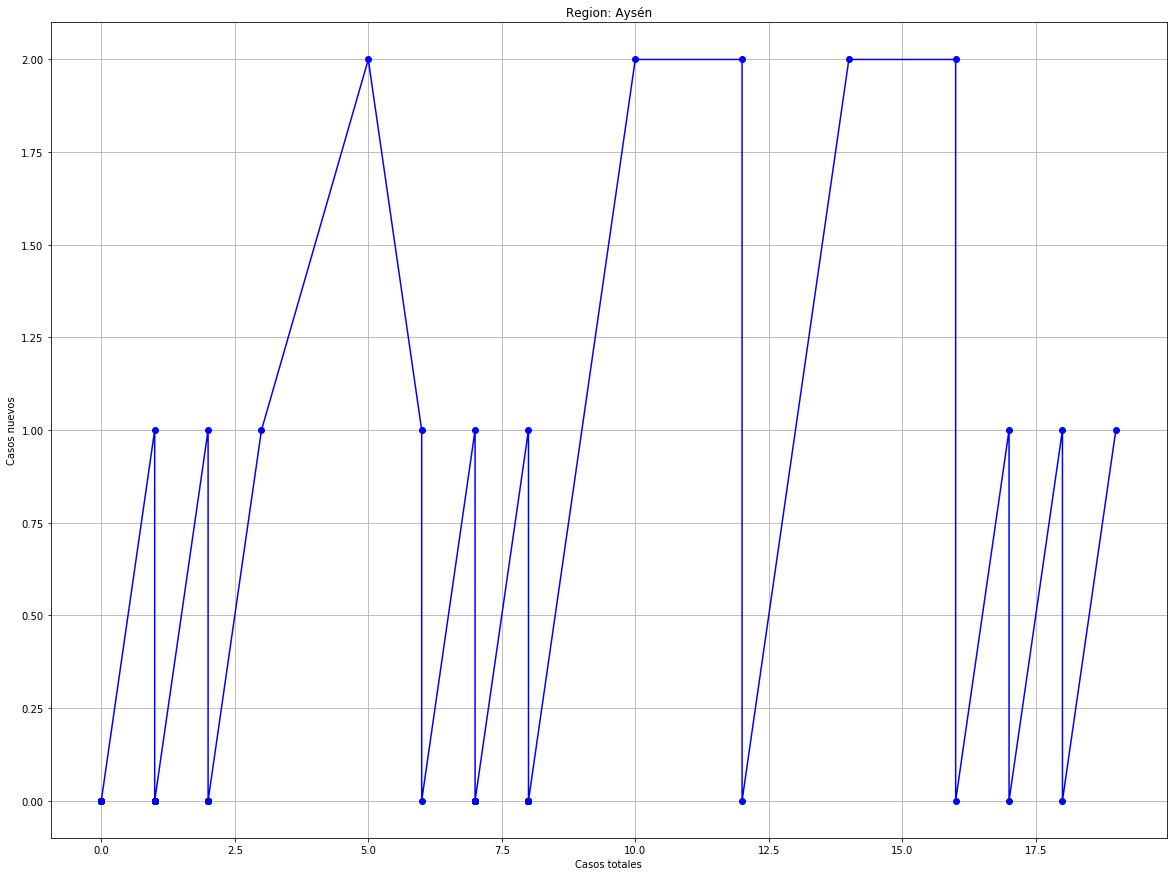

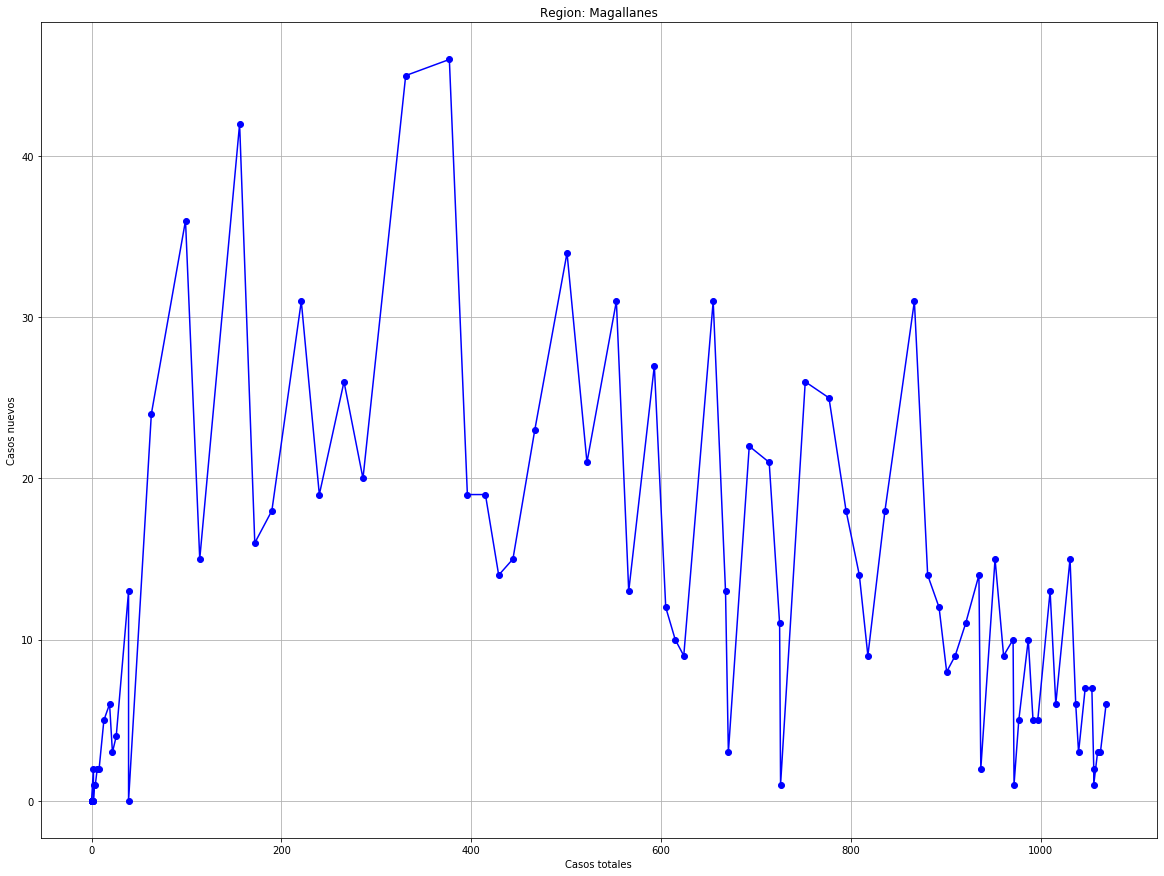

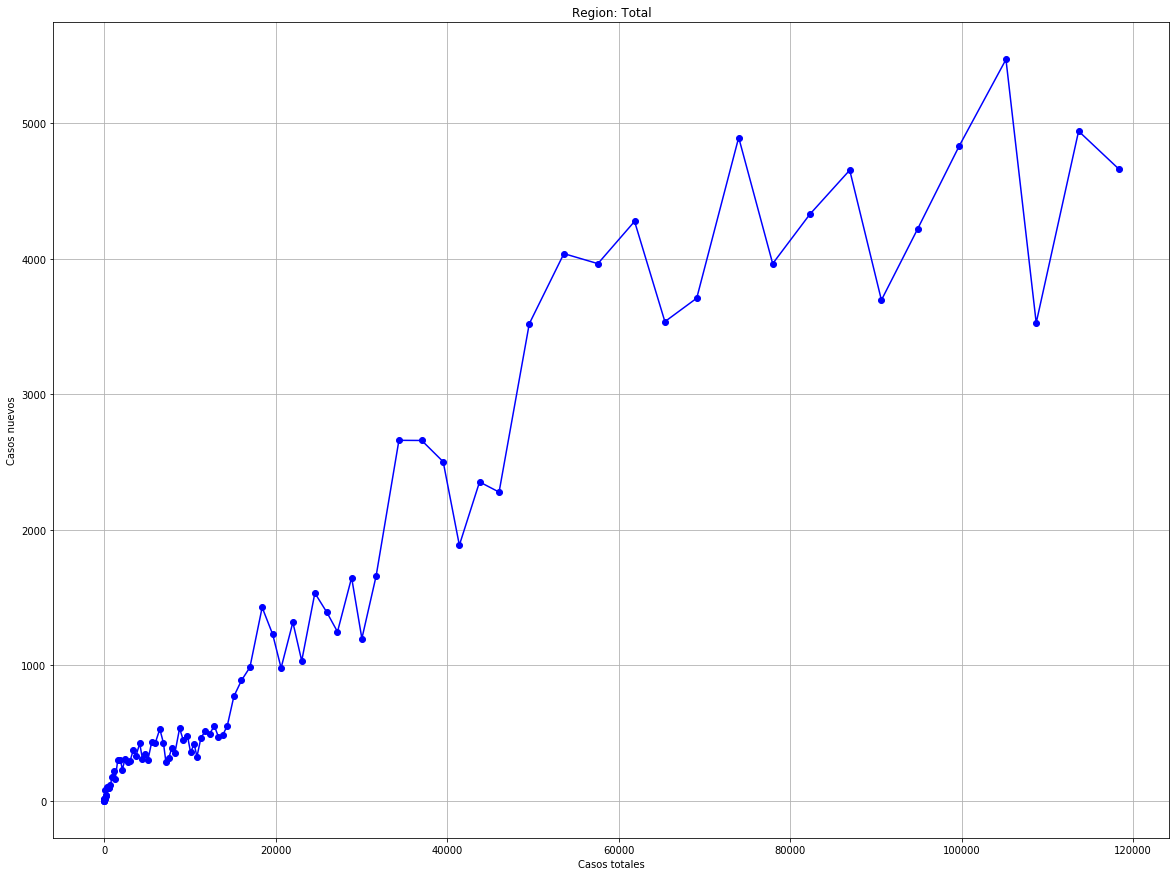

In [10]:
regiones = data_acumulados.columns[1:]
for region in regiones:
    graph(region)

In [7]:
interact(graph,
         region = regiones)
None

interactive(children=(Dropdown(description='region', options=('Arica y Parinacota', 'Tarapacá', 'Antofagasta',…

## Nuevos contagios por días

In [11]:
def labelonbars(X, Y):
    n = len(X)
    for i in range (n):
        number = '{:,}'.format(int(Y[i])).replace(',', '.')
        plt.annotate(
            number, xy=(X[i], Y[i]),
            xytext =(0, 10),
            textcoords="offset points",
            ha ='center', va='bottom',
            size = '15')
        
def graph_for_days(region):
    fechas        = data_nuevos["Fecha"].values.tolist()
    casos_nuevos  = data_nuevos[region].values.tolist()
    casos_totales = data_acumulados[region].values.tolist()
    
    plt.figure(figsize=(20,15))
    plt.plot(fechas, casos_nuevos, 'bo-')
    plt.title("Region: " + region)
    plt.grid()
    plt.xlabel('Fecha')
    plt.ylabel('Casos nuevos')
    labelonbars(fechas, casos_nuevos)
    #plt.xscale('log')
    #plt.yscale('log')
    plt.xticks(fechas, rotation='vertical')
    plt.show()

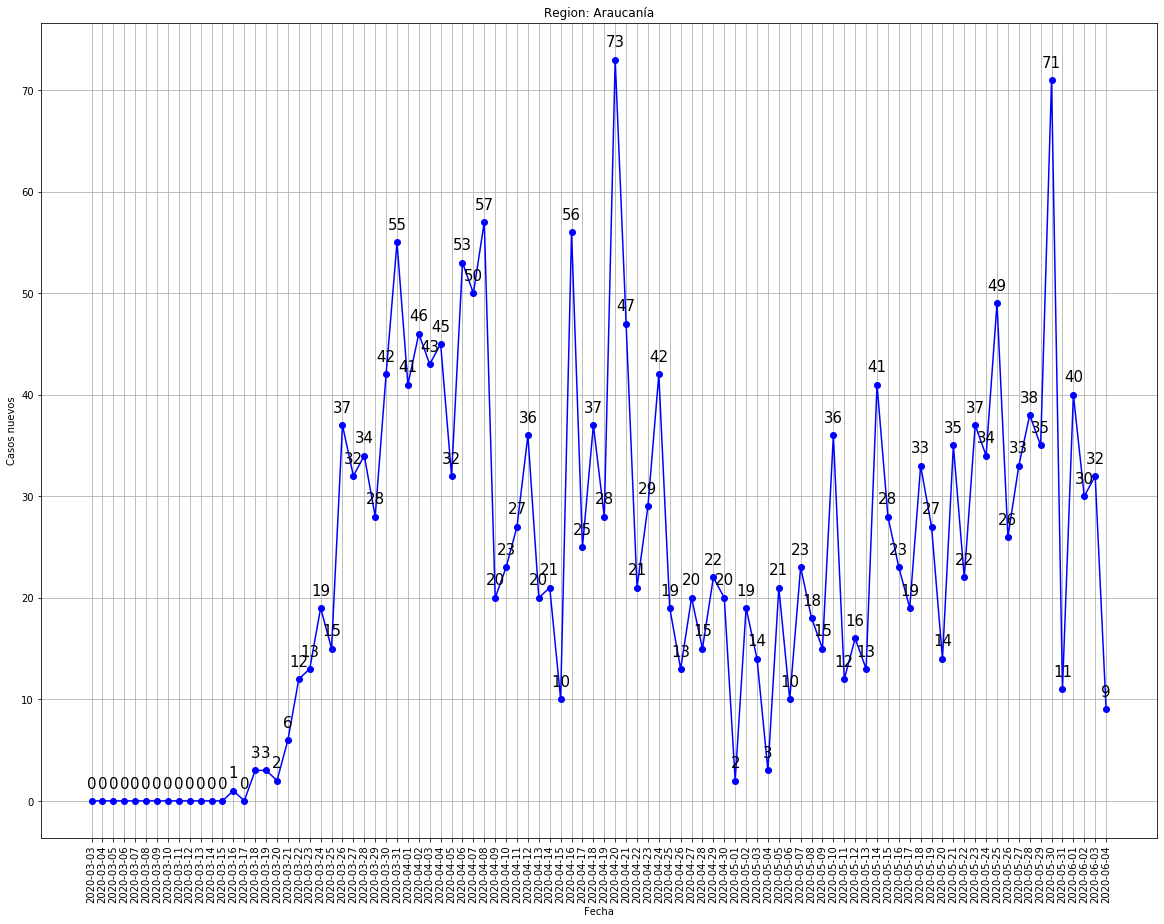

In [12]:
graph_for_days("Araucanía")

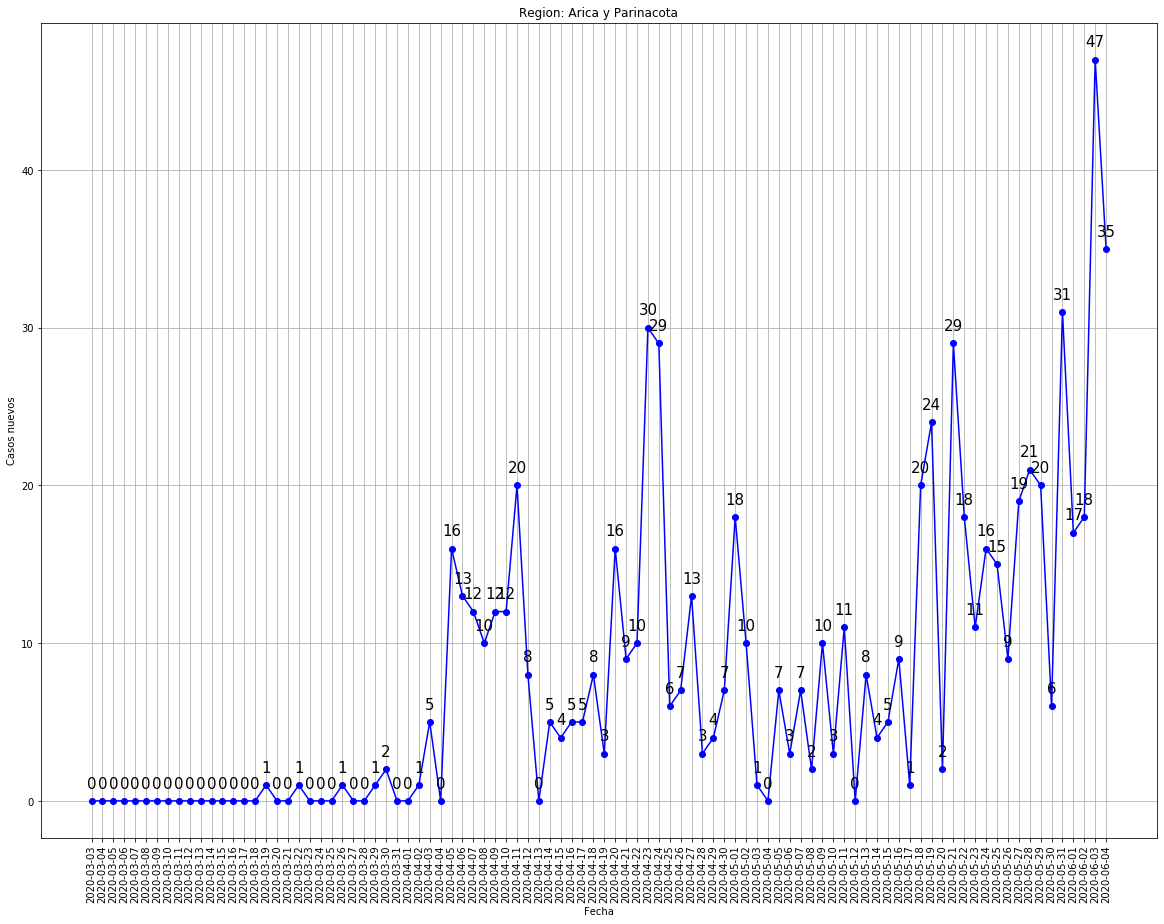

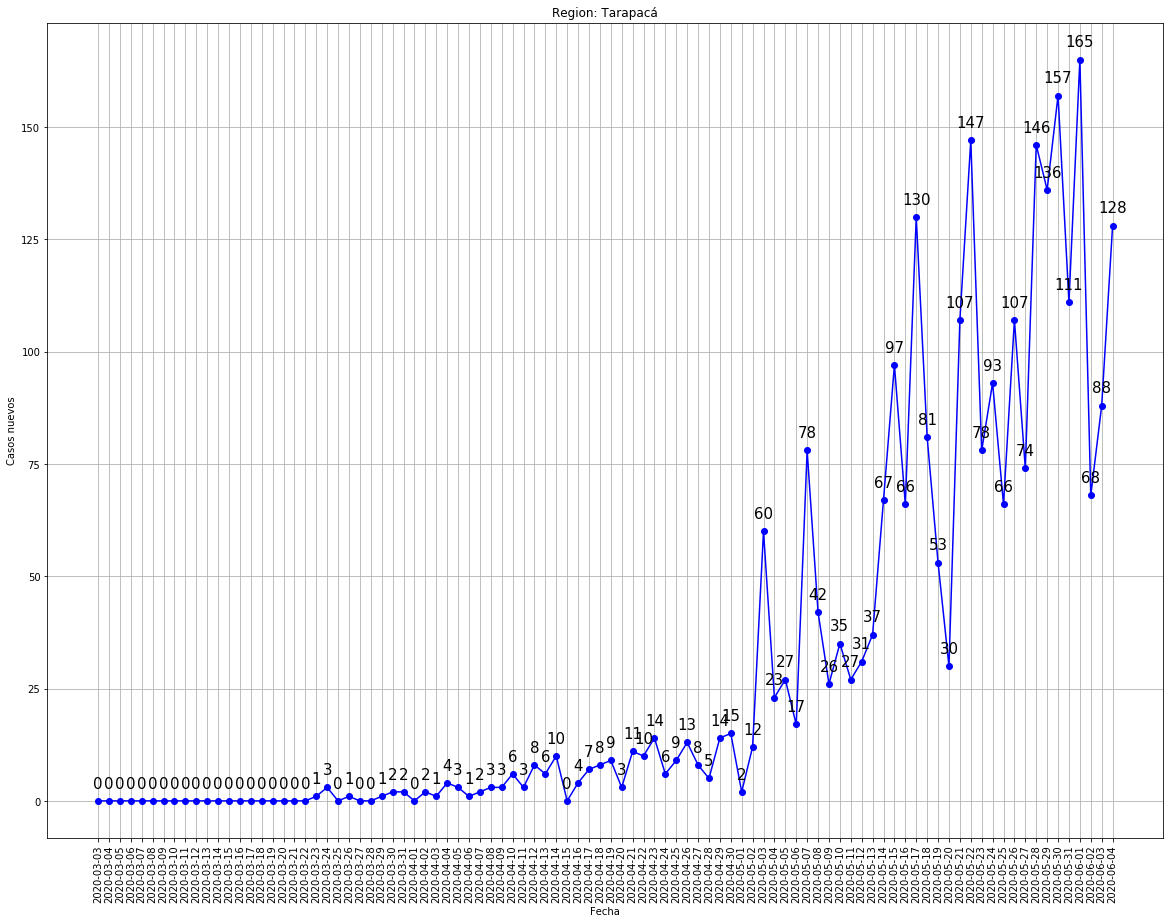

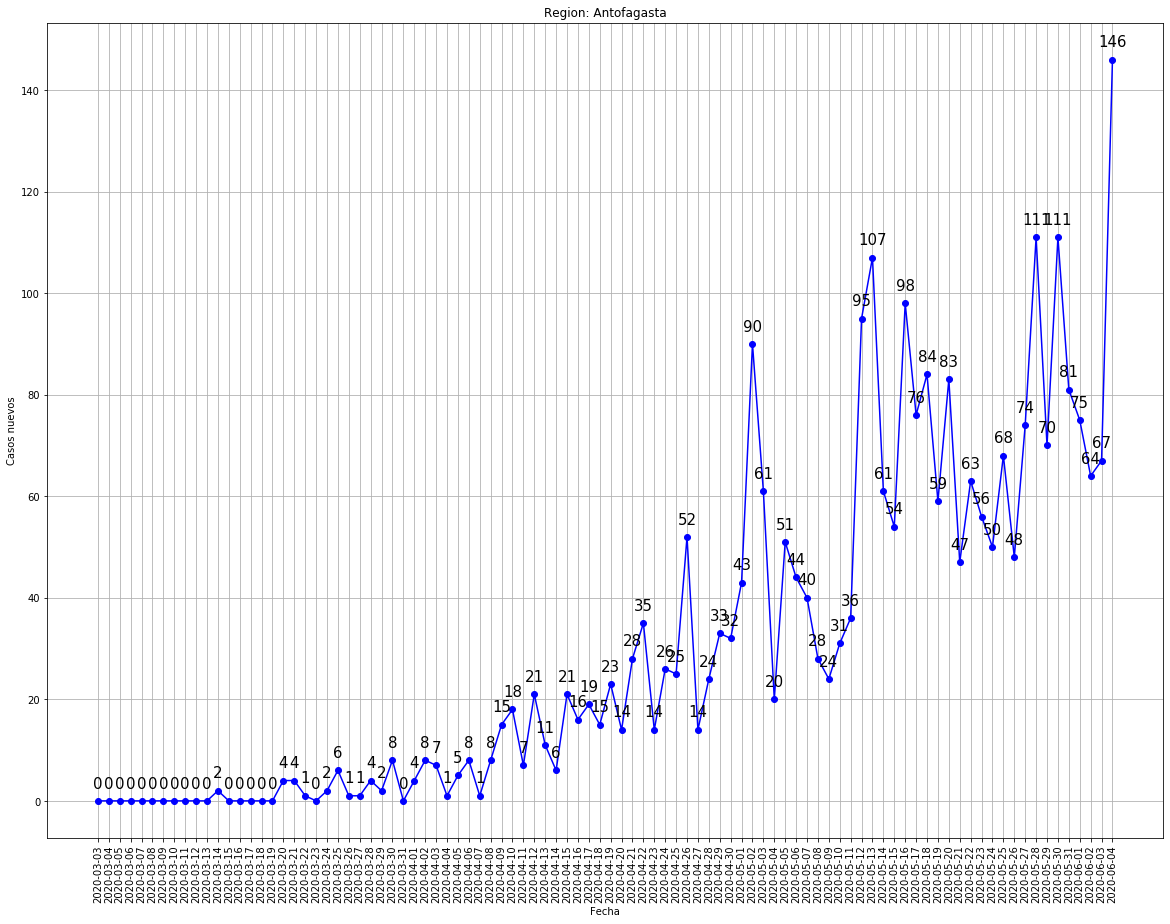

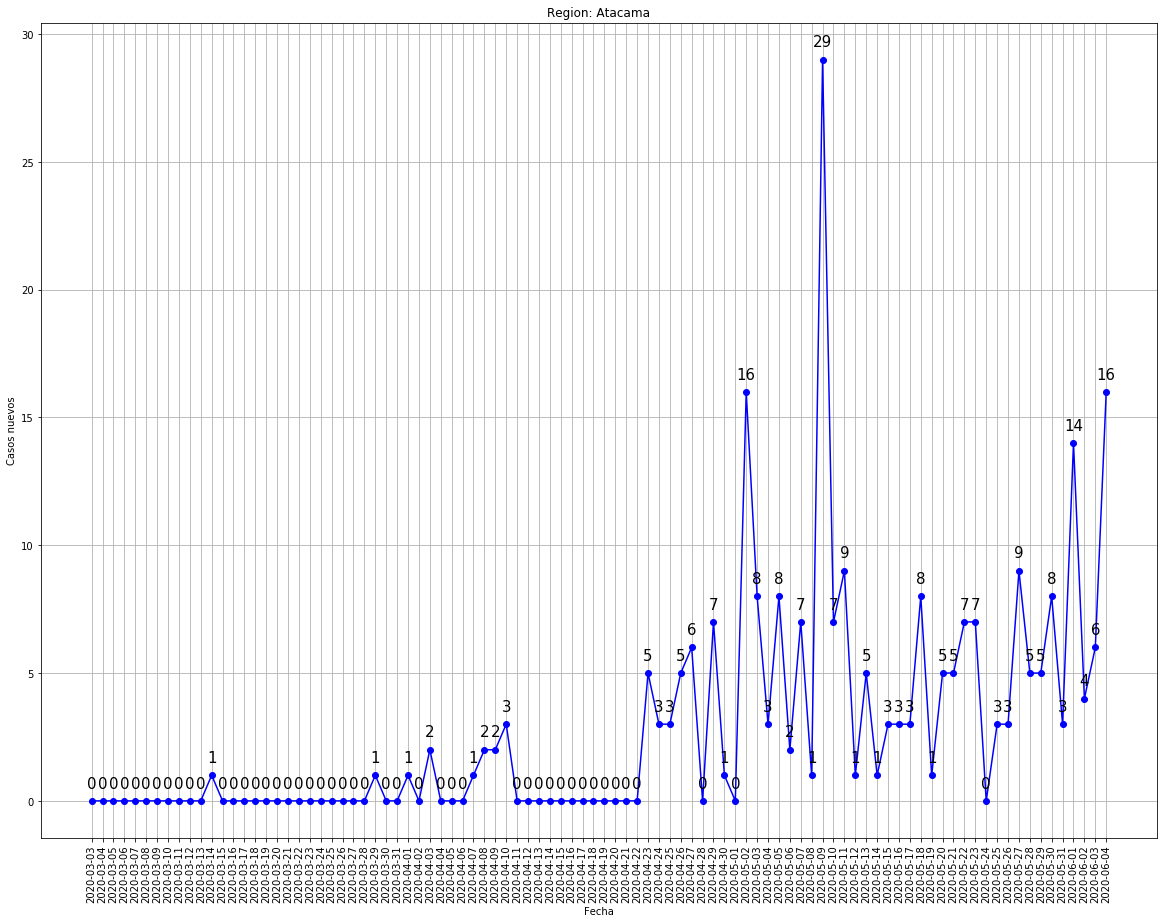

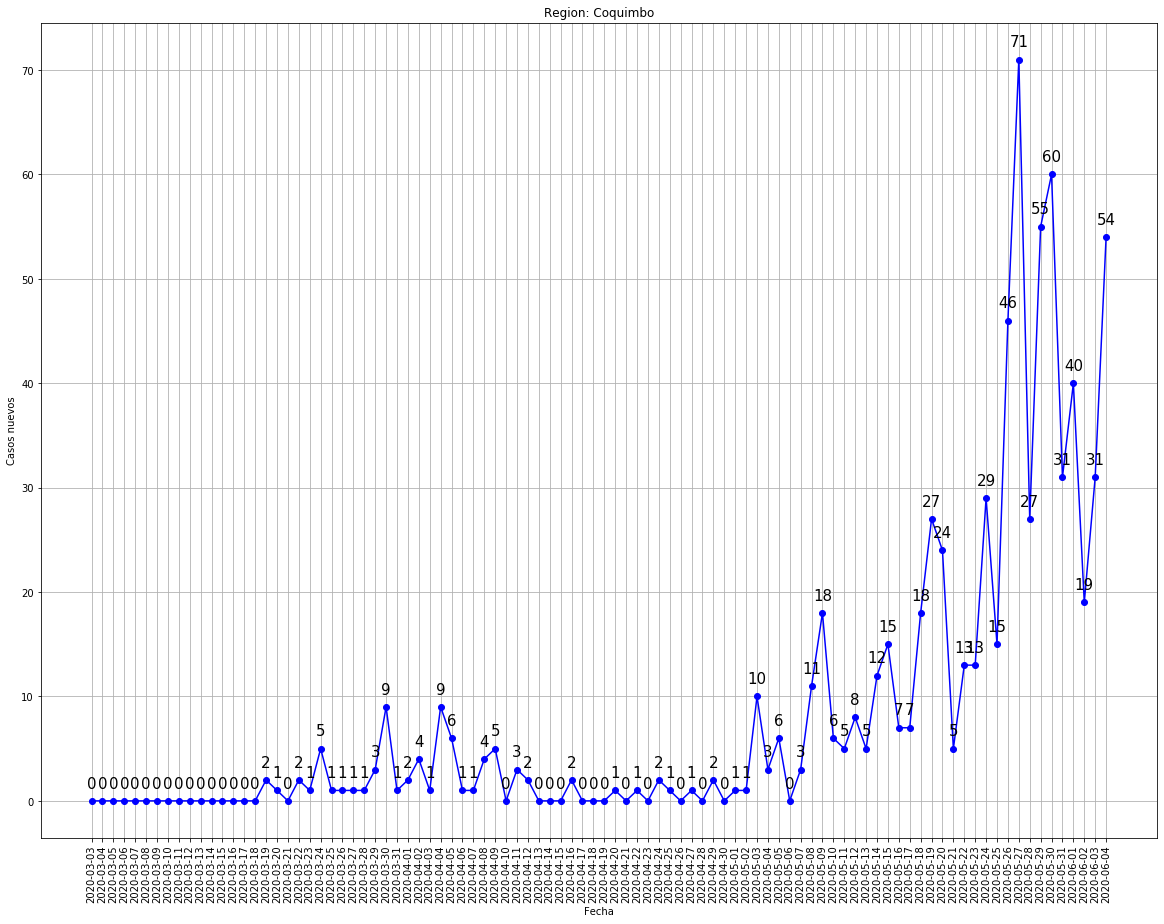

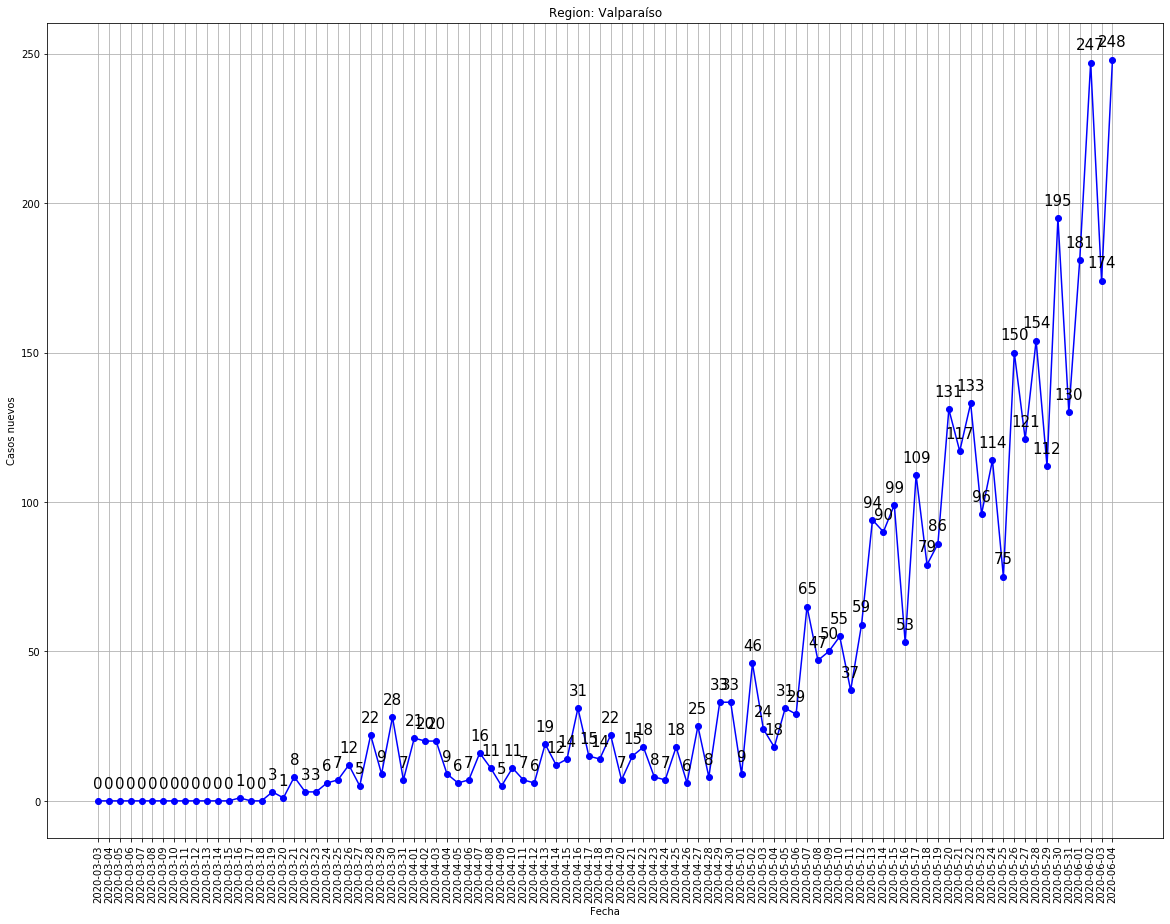

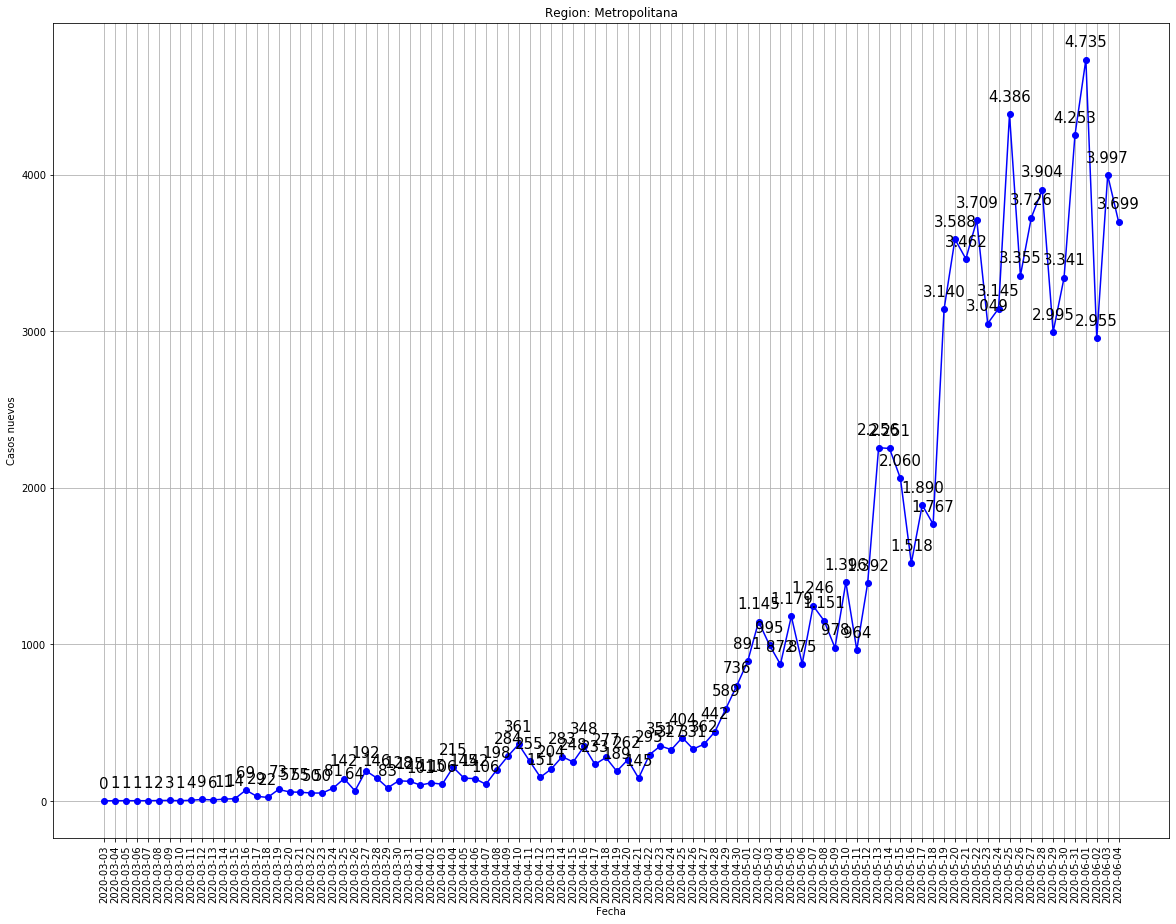

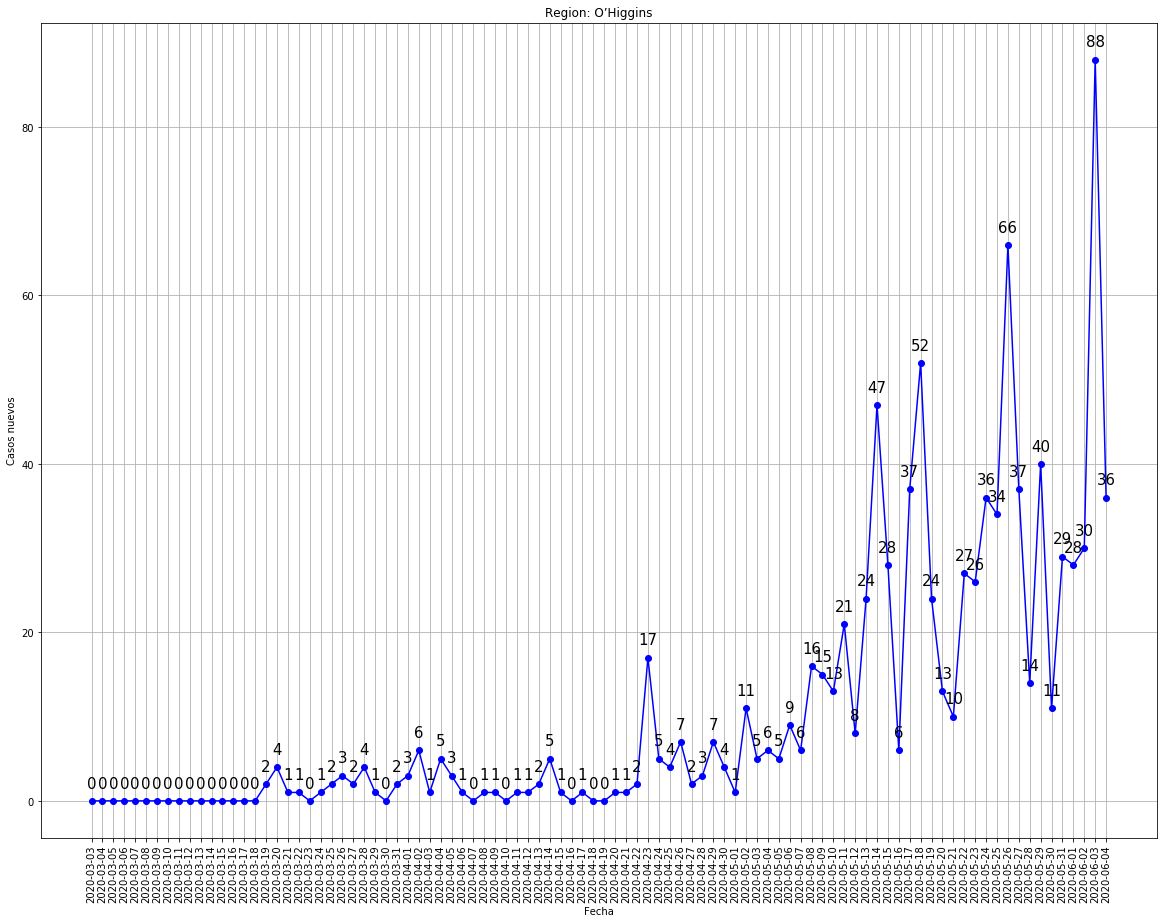

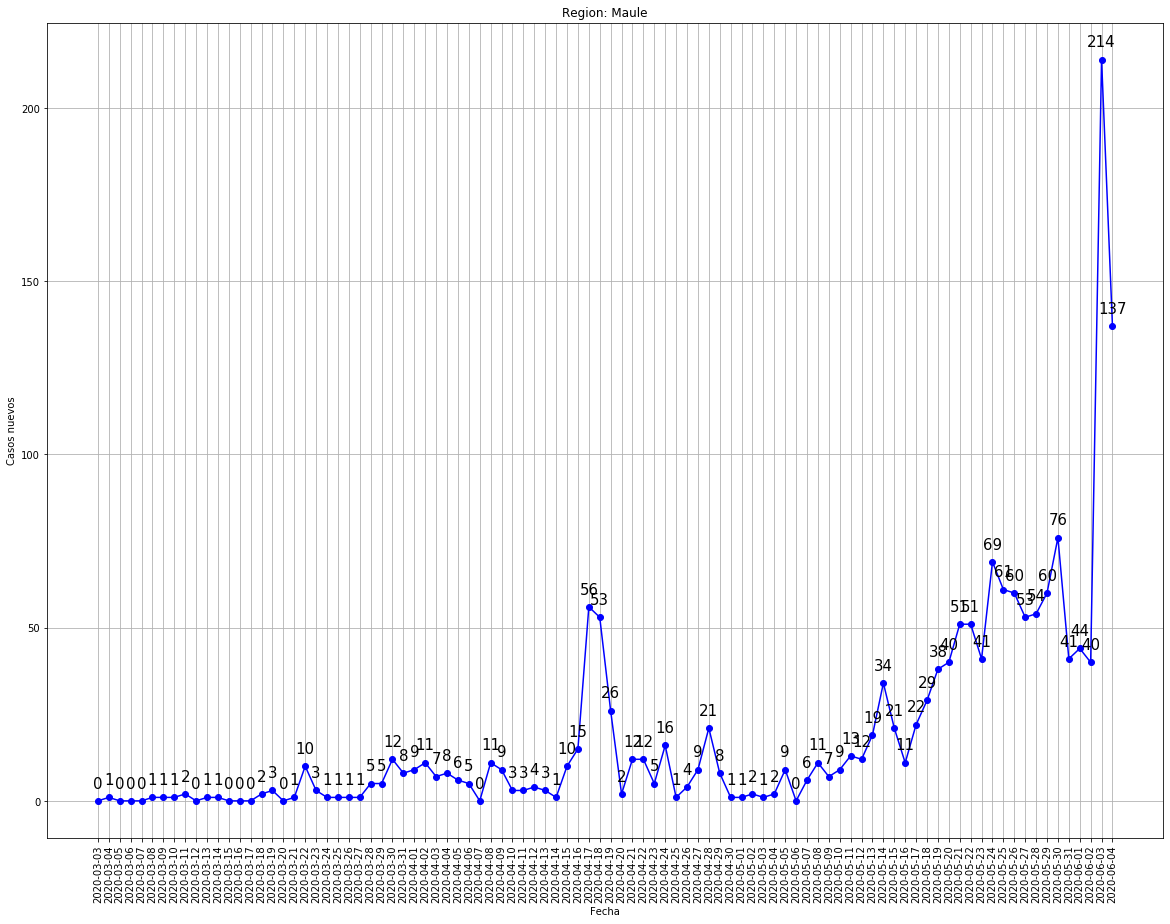

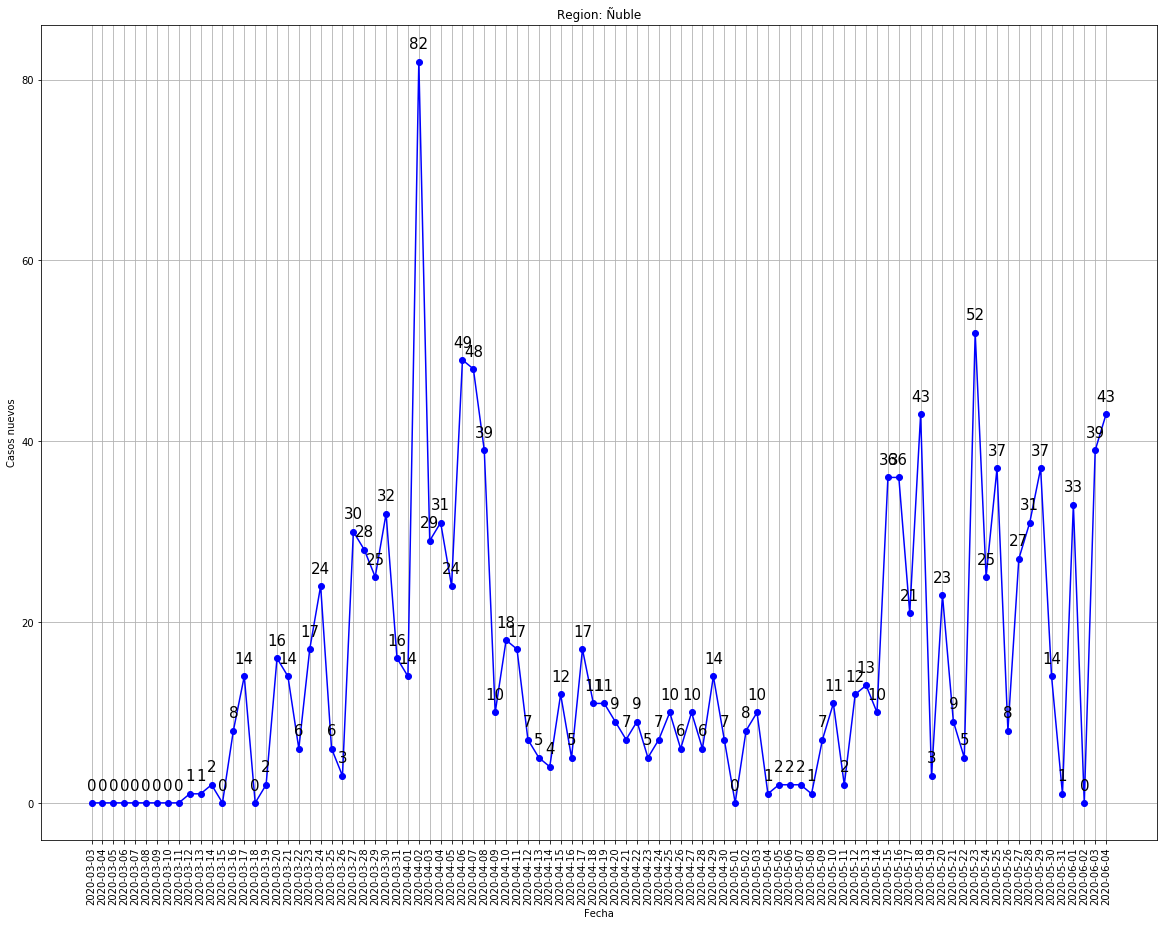

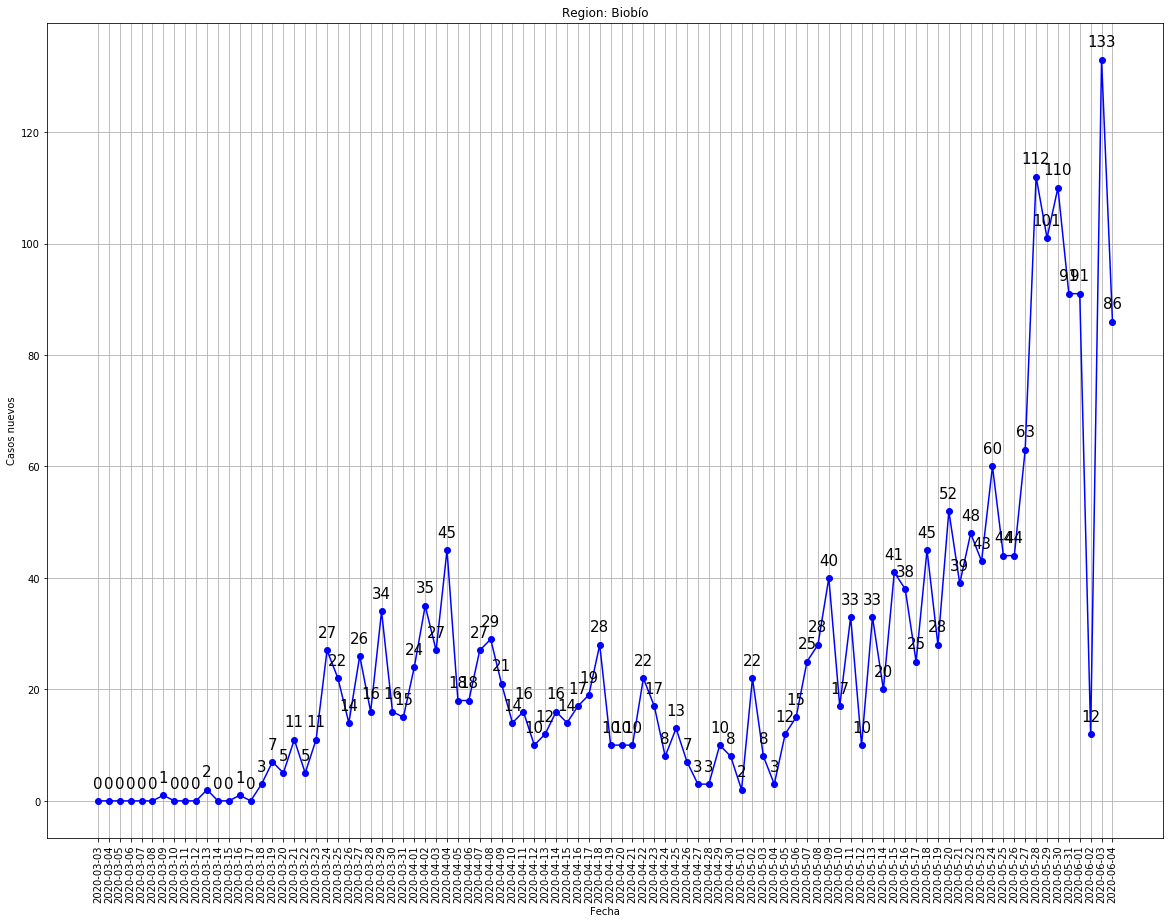

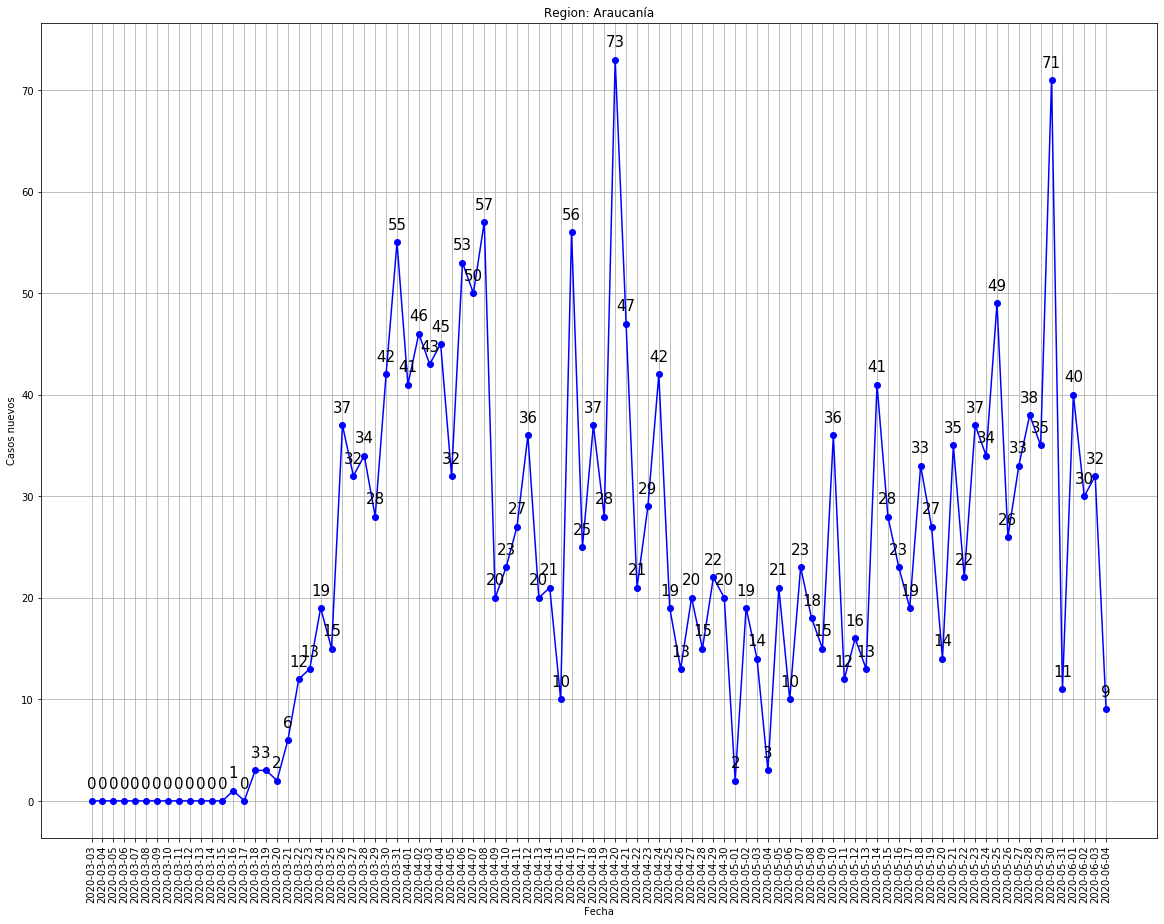

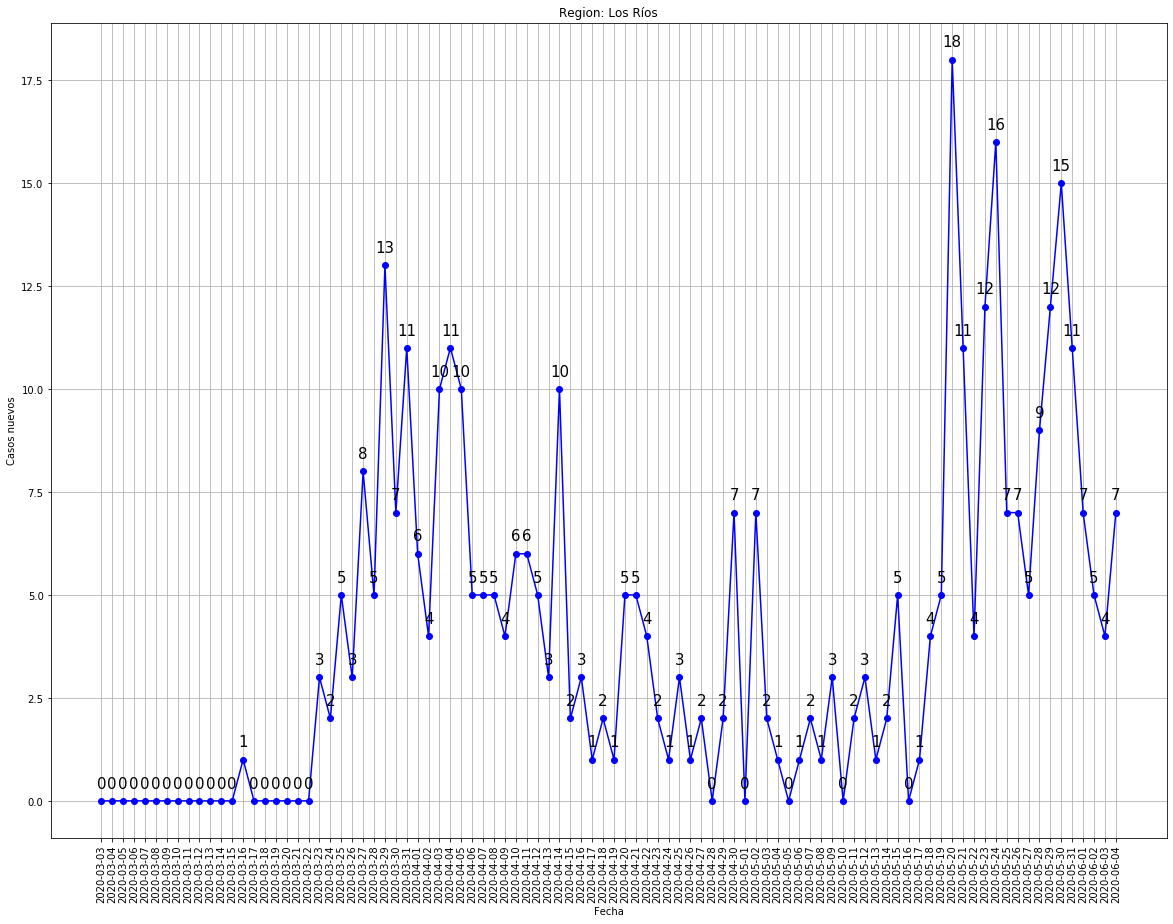

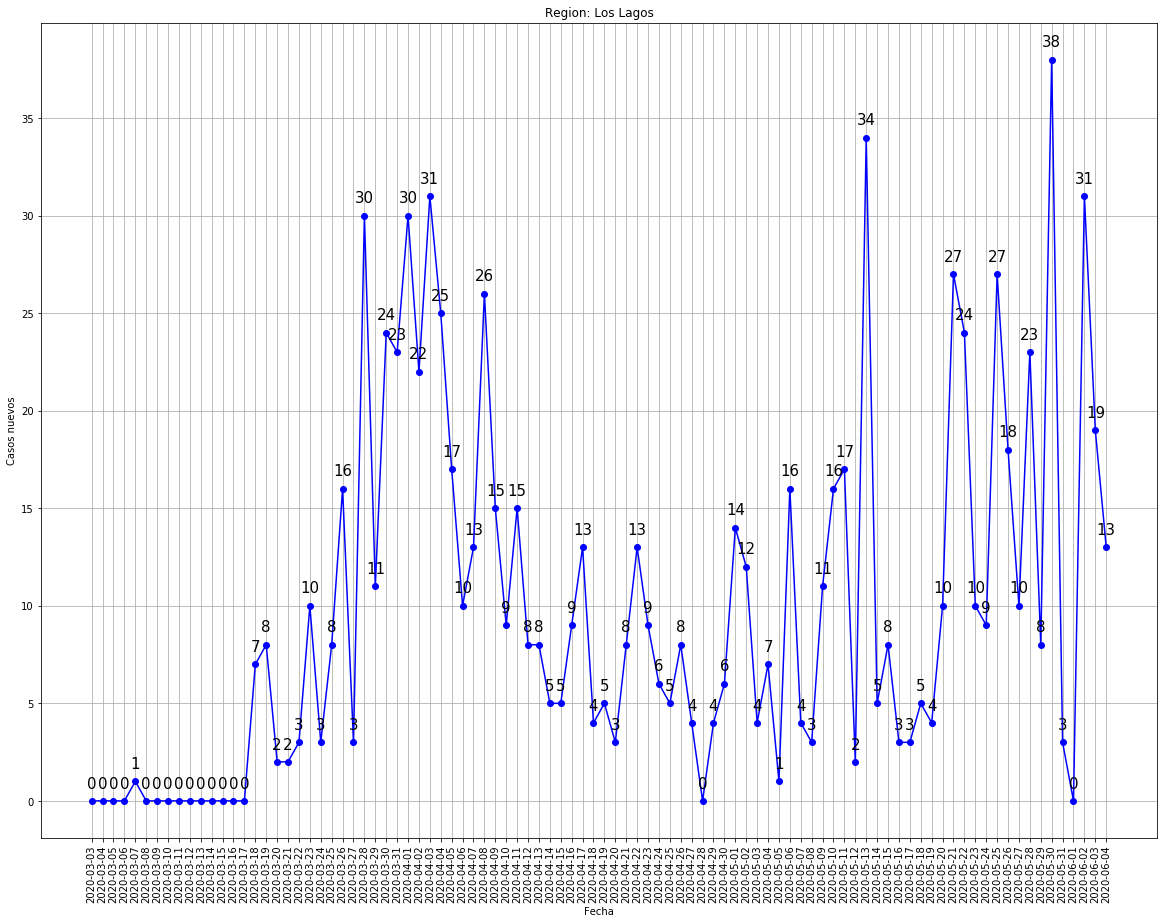

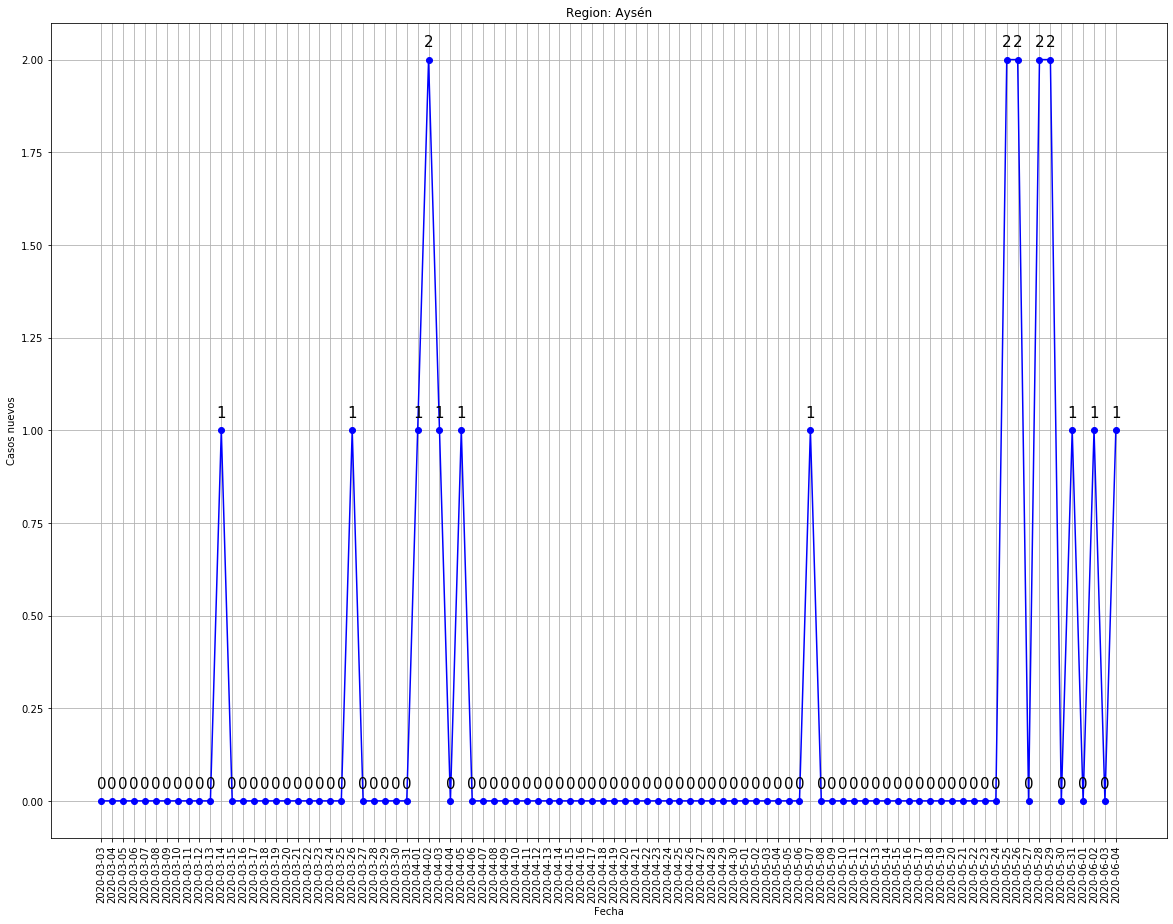

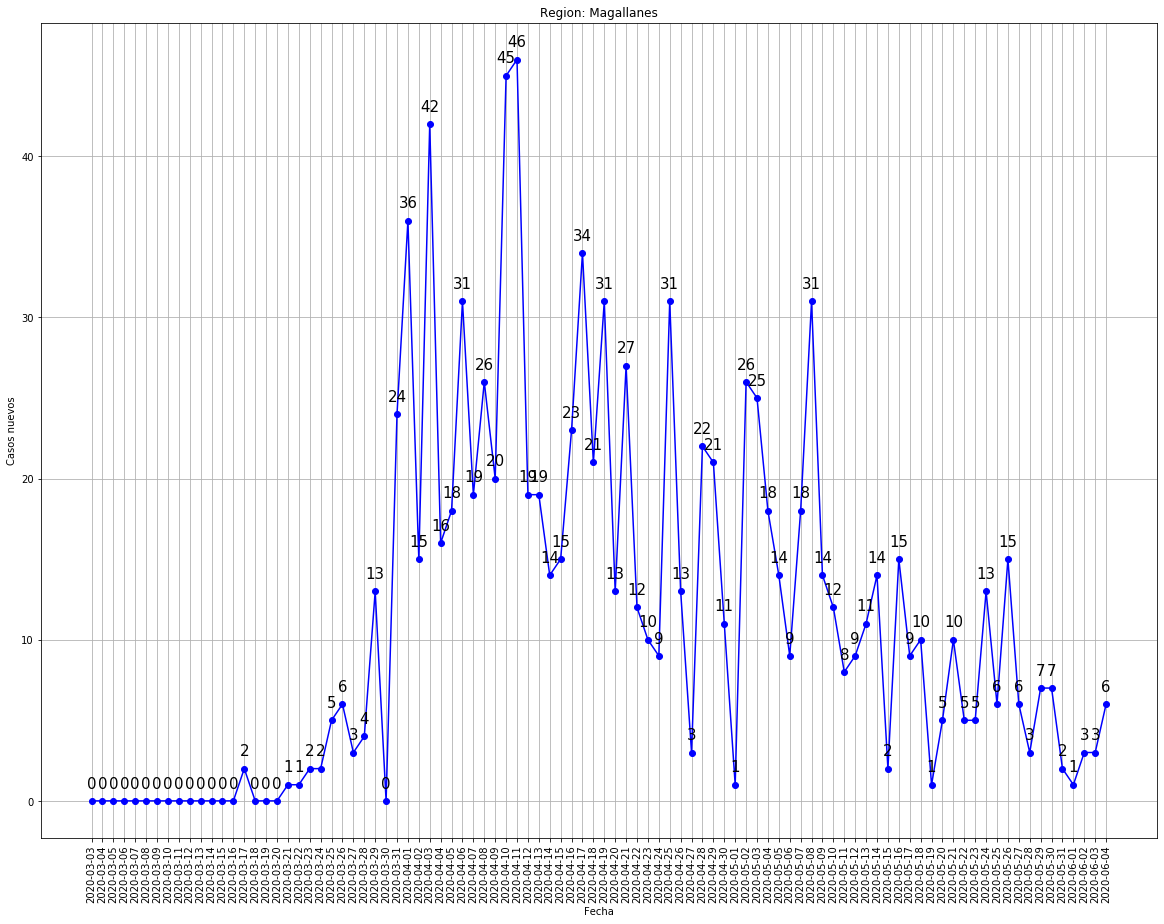

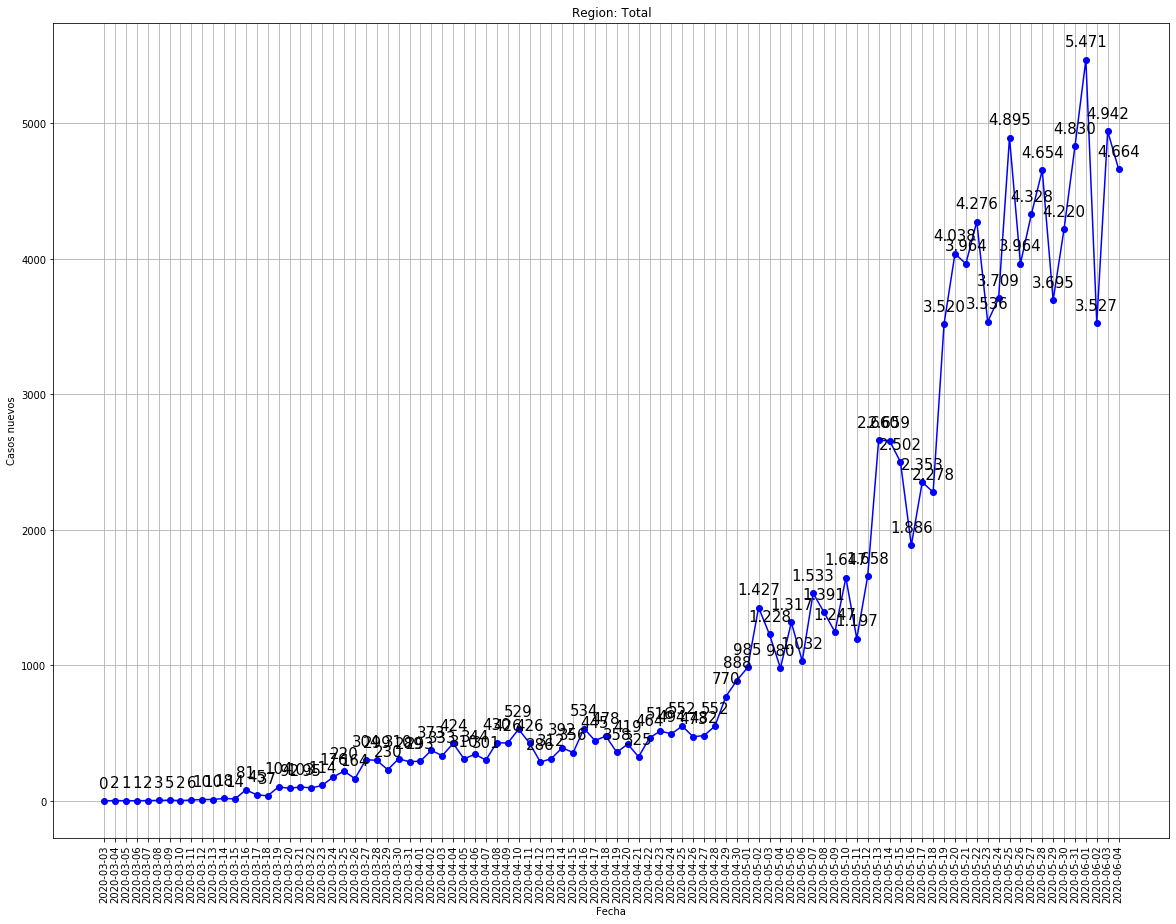

In [13]:
regiones = data_acumulados.columns[1:]
for region in regiones:
    graph_for_days(region)

In [11]:
interact(graph_for_days,
         region = regiones)
None

interactive(children=(Dropdown(description='region', options=('Arica y Parinacota', 'Tarapacá', 'Antofagasta',…